In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax, pearsonr
from scipy.special import boxcox1p
from sklearn.feature_selection import VarianceThreshold
from featexp import get_univariate_plots

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Estas variables pueden ser numéricas, categóricas u ordinales, donde su orden es importante.

**Agrupación de variables**

- *Numéricas*: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath? (enteros de 0 a 3), BsmtHalfBath? (enteros de 0 a 2), FullBath? (enteros de 0 a 3), HalfBath? (enteros de 0 a 2), BedroomAbvGr? (enteros de 0 a 8), KitchenAbvGr? (enteros de 0 a 3), TotRmsAbvGrd? (enteros de 2 a 14), Fireplaces? (enteros de 0 a 3), GarageCars? (enteros de 0 a 4), GarageArea, GarageYrBlt, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, YearBuilt, YearRemodAdd, YrSold, MoSold
- *Ordinales*: LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Street, Alley, HeatingQC, CentralAir, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence
- *Categoricas*: MSSubClass, MSZoning, LandContour, LotConfig, Neighborhood(muchos tipos), Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, Electrical, Functional, GarageType, MiscFeature, SaleType, SaleCondition

**Distribución del target**

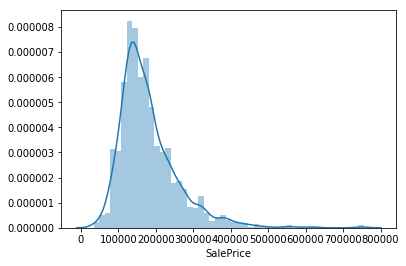

In [4]:
sns.distplot(train['SalePrice'])

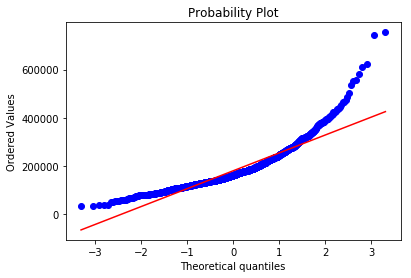

In [5]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Si dibujamos la distribución de la variable objetivo así como el QQ-plot para comprobar su normalidad vemos como cláramaente es una distribución skew hacia la derecha. Estadísticamente los modelos clásicos de Machine Learning funcionan mejor cuando la distribución es normal, por lo que se va a aplicar una transformación logarítmica

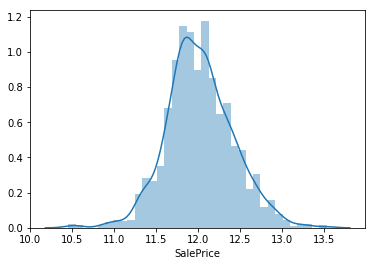

In [6]:
sns.distplot(np.log1p(train['SalePrice']))

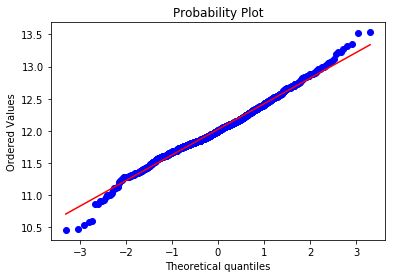

In [7]:
fig = plt.figure()
res = stats.probplot(np.log1p(train['SalePrice']), plot=plt)
plt.show()

Se puede ver como ahora si cumple los requisitos de normalidad. La idea es entrenar los modelos con la variable objetivo transformada y a la hora de predecir revertir la transformación aplicando la función expm1

In [8]:
train['Target_Normalized'] = np.log1p(train['SalePrice'])

**Missing Values**

Se va a analizar los valores faltantes de los datos. Primero se va a hacer un ranking de variables ordenados por si porcentaje de valores faltantes:

In [9]:
data = pd.concat((train.drop(['SalePrice', 'Target_Normalized'], axis=1), test)).reset_index(drop=True)
data.drop(['Id'], axis=1, inplace=True)
data.shape

(2919, 79)

In [10]:
variables_na_sum = data.isna().sum() / data.shape[0]
variables_na_sum.sort_values(ascending=False)[:40]

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
BsmtFullBath    0.000685
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
Exterior2nd     0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Exterior1st     0.000343
SaleType        0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageArea      0.000343
GarageCars      0.000343
OverallQual     0.000000
OverallCond     0.000000
LotArea         0.000000
Street          0.000000
LotShape        0.000000
LandContour     0.000000


Se puede ver como hay variables con más de un 40% de valores faltantes, por lo tanto, estas variables hay que eliminarlas. 

In [11]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

La variable Utilities también hay que eliminarla ya que su variabilidad es prácticamente nula. A continuación se procede a la imputación de NAs.

In [12]:
#se eliminan las variables con muchos NAs como se ha dicho antes
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Utilities'], axis=1, inplace=True)

#Para el LotFrontage se va a imputar segun la mediana del vecindario. Normalmente el vecindario mantiene este mismo valor
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#Las variables de garage no numéricas se rellenan con None para especificar que no hay garage en ese inmueble
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

#Las variables de garage numéricas se rellenan con 0 indicando que no hay garage tampoco
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
    
#Las variables relacionadas con el sótano numéricas se rellenan con 0 indicando que no hay
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

#Lo mismo con las no numéricas del sótano
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
    
#Se sigue la misma teoría que las anteriores variables para  el Masonry veneer area

data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

#El tipo de zona del piso lo rellenamos por la moda
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

#Como dice en el fichero de descripción de variables, si la variable Functional no tiene valor, se indica como Typ
data["Functional"] = data["Functional"].fillna("Typ")

#Las siguientes variables se rellenan por la moda
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

#Esta variable categórica se rellena cono None para indicar que no tiene 
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [13]:
data.isna().sum().sum()

0

**Ajuste de variables**

Se van a ajustar algunas variables categóricas y ordinales para mantener su orden:

In [14]:
data['MSSubClass'][data['MSSubClass'] == 20] = '1-STORY 1946 & NEWER ALL STYLES'
data['MSSubClass'][data['MSSubClass'] == 30] = '1-STORY 1945 & OLDER'
data['MSSubClass'][data['MSSubClass'] == 40] = '1-STORY W/FINISHED ATTIC ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 45] = '1-1/2 STORY - UNFINISHED ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 50] = '1-1/2 STORY FINISHED ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 60] = '2-STORY 1946 & NEWER'
data['MSSubClass'][data['MSSubClass'] == 70] = '2-STORY 1945 & OLDER'
data['MSSubClass'][data['MSSubClass'] == 75] = '2-1/2 STORY ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 80] = 'SPLIT OR MULTI-LEVEL'
data['MSSubClass'][data['MSSubClass'] == 85] = 'SPLIT FOYER'
data['MSSubClass'][data['MSSubClass'] == 90] = 'DUPLEX - ALL STYLES AND AGES'
data['MSSubClass'][data['MSSubClass'] == 120] = '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
data['MSSubClass'][data['MSSubClass'] == 150] = '1-1/2 STORY PUD - ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 160] = '2-STORY PUD - 1946 & NEWER'
data['MSSubClass'][data['MSSubClass'] == 180] = 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
data['MSSubClass'][data['MSSubClass'] == 190] = '2 FAMILY CONVERSION - ALL STYLES AND AGES'

In [15]:
def fixing_ordinal_variables(data, variable):
    data[variable][data[variable] == 'Ex'] = 5
    data[variable][data[variable] == 'Gd'] = 4
    data[variable][data[variable] == 'TA'] = 3
    data[variable][data[variable] == 'Fa'] = 2
    data[variable][data[variable] == 'Po'] = 1
    data[variable][data[variable] == 'None'] = 0
    data[variable] = data[variable].apply(int)

In [16]:
fixing_ordinal_variables(data,'ExterQual')
fixing_ordinal_variables(data,'ExterCond')
fixing_ordinal_variables(data,'BsmtCond')
fixing_ordinal_variables(data,'BsmtQual')
fixing_ordinal_variables(data,'HeatingQC')
fixing_ordinal_variables(data,'KitchenQual')
fixing_ordinal_variables(data,'GarageQual')
fixing_ordinal_variables(data,'GarageCond')

In [17]:
data['PavedDrive'] = data['PavedDrive'].map({'Y':3, 'P':2, 'N':1}).apply(int)
data['GarageFinish'] = data['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'None': 0}).apply(int)
data['LandSlope'] = data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1}).apply(int)
data['LotShape'] = data['LotShape'].map({'Reg': 4, 'IR1':3, 'IR2': 2, 'IR3': 1}).apply(int)
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}).apply(int)
data['Street'] = data['Street'].map({'Pave': 0, 'Grvl': 1}).apply(int)
data['CentralAir'] = data['CentralAir'].map({'N': 0, 'Y': 1}).apply(int)
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}).apply(int)
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}).apply(int)

In [18]:
variables_numericas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold']

variables_ordinales = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual',
                       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'Street', 'Alley', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

variables_ordinales = list(set(variables_ordinales).intersection(set(data.columns.tolist())))

variables_categoricas = list(set(data.columns.tolist()) - set(variables_numericas) - set(variables_ordinales) - {'SalePrice', 'Target_Normalized'})
variables_categoricas

['SaleType',
 'LandContour',
 'LotConfig',
 'Condition2',
 'Neighborhood',
 'Exterior2nd',
 'GarageType',
 'Heating',
 'Foundation',
 'MSZoning',
 'RoofStyle',
 'SaleCondition',
 'BldgType',
 'MasVnrType',
 'Electrical',
 'MSSubClass',
 'Functional',
 'RoofMatl',
 'Condition1',
 'Exterior1st',
 'HouseStyle']

**Correlacción de variables**

Volvemos a dividir los datos en train y test para ver la correlación con la variable objetivo

In [19]:
train_imputed = data[:train.shape[0]]
train_imputed['SalePrice'] = train['SalePrice']
train_imputed['Target_Normalized'] = train['Target_Normalized']

test_imputed = data[train.shape[0]:]

train_imputed.shape, test_imputed.shape

((1460, 75), (1459, 73))

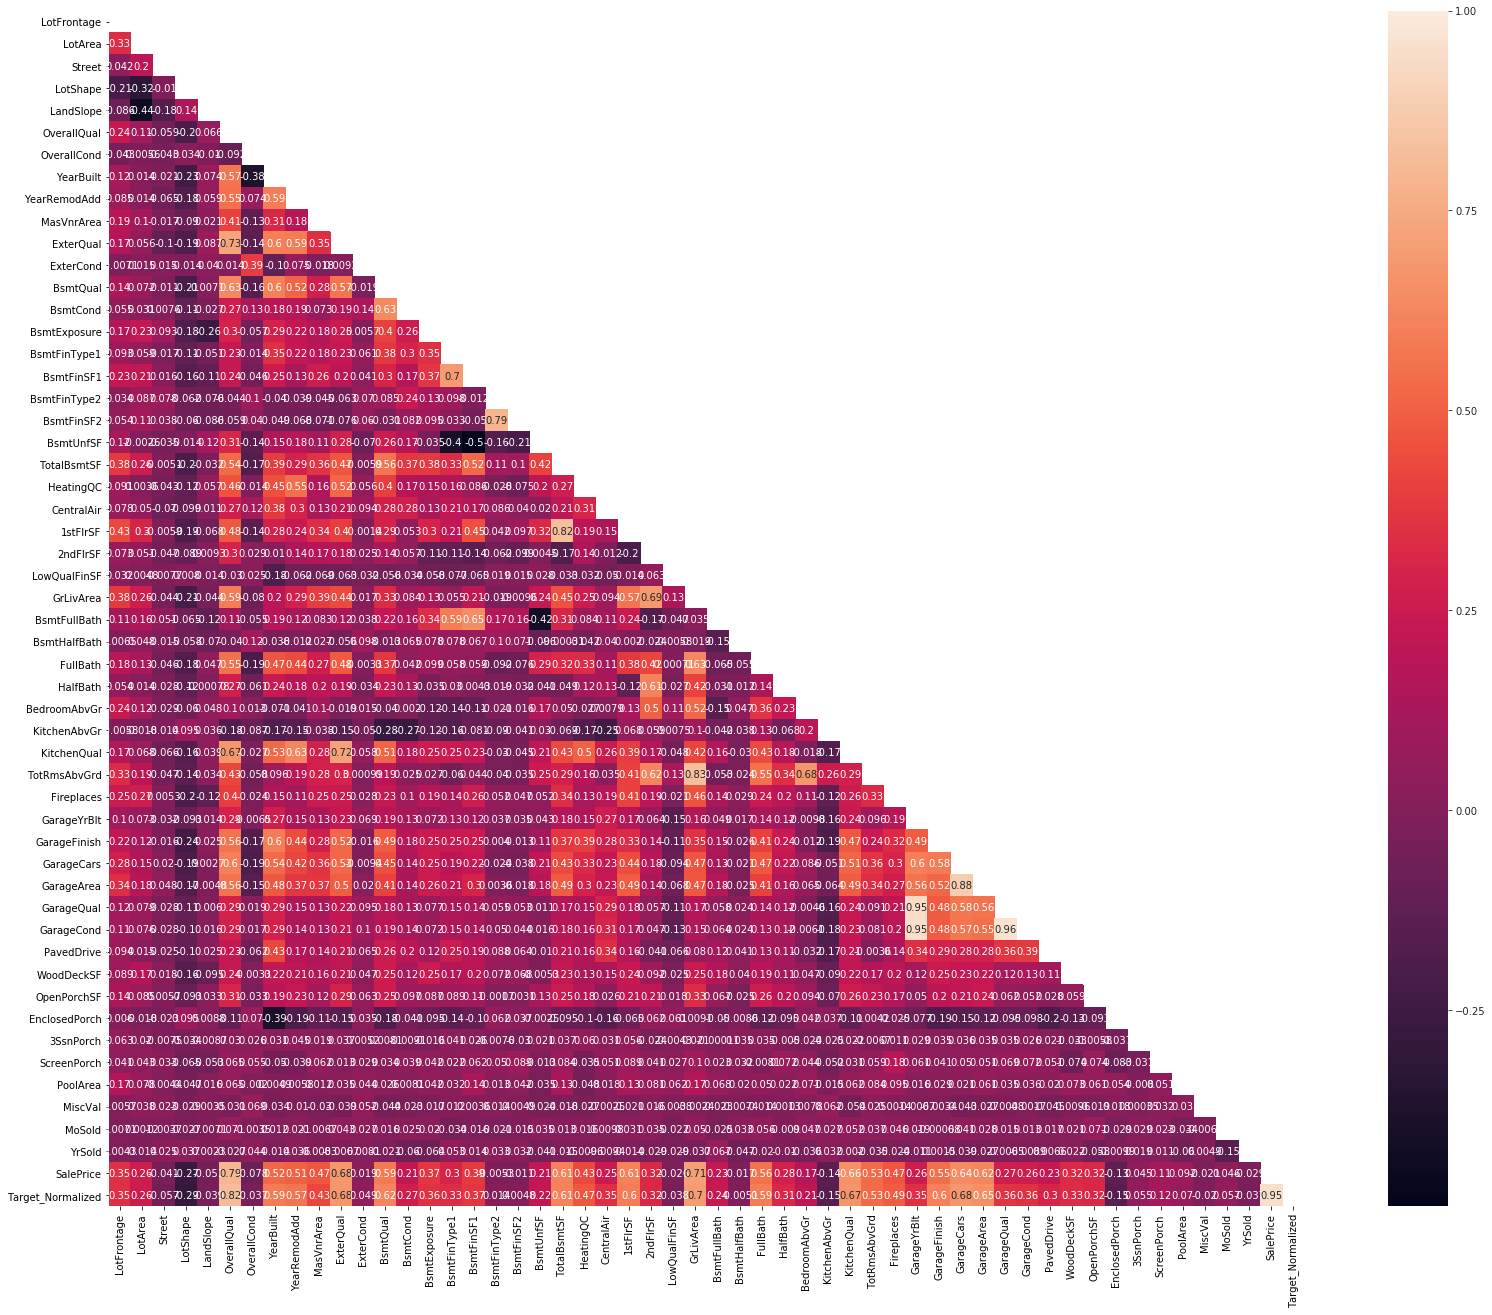

In [20]:
fig, ax = plt.subplots(figsize=(30,22))
corrmat = train_imputed.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corrmat, annot=True, square=True, mask=mask, ax=ax)

Como este mapa de calor es demasiado grande, vamos a mostrar las variables con mayor correlación con la variable objetivo:

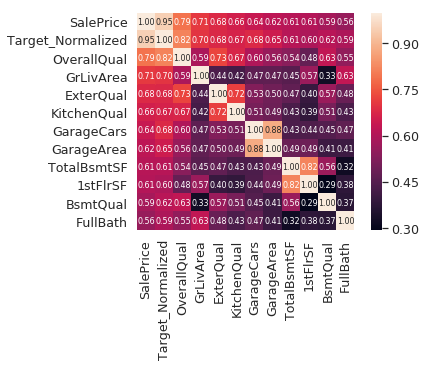

In [21]:
k = 12
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_imputed[cols].values.T)
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Se puede ver como las variables con mayor correlación son OverallQual y GrLivArea. Más adelante se hará un scatterplot para analizarlas

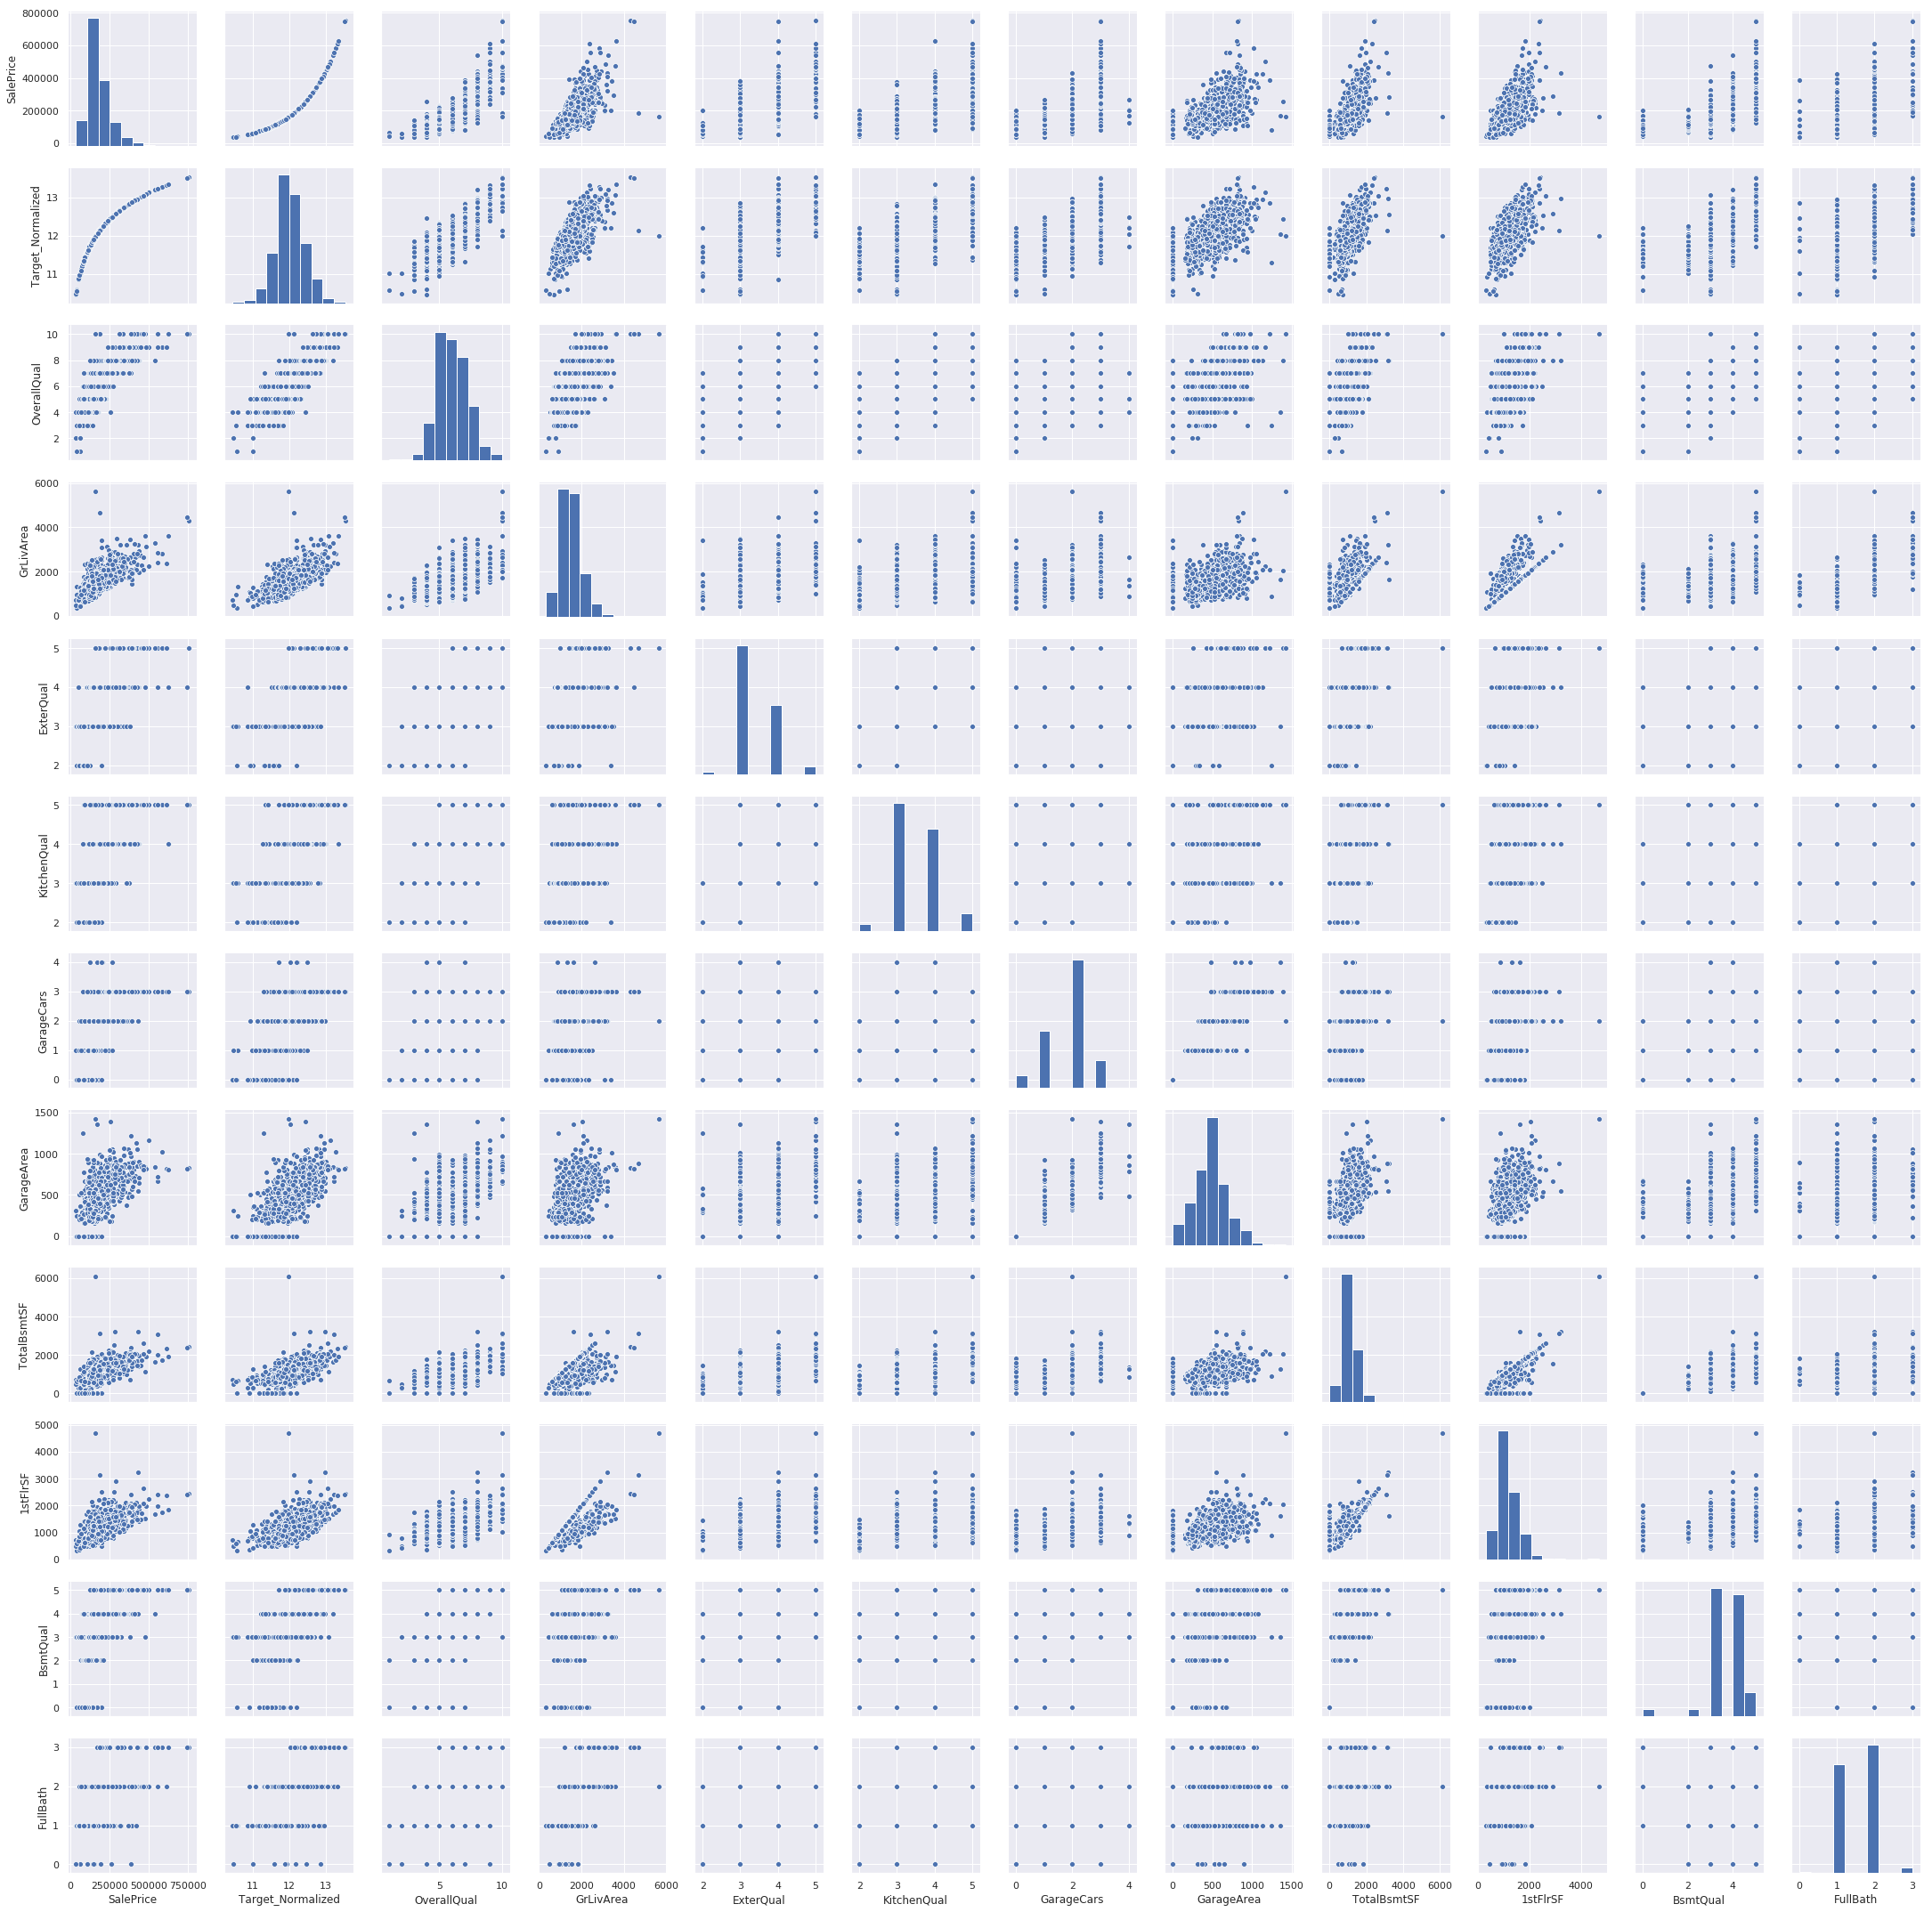

In [22]:
sns.set()
sns.pairplot(train_imputed[cols], size = 2.5)
plt.show();

Se puestra un pairplot de scatterplots y se puede ver gráficamente las distintas correlaciones. También se visualiza claramente cuales son las variables categóricas/ordinales y numéricas

**Variabilidad de las variables**

La idea del análisis de variabilidad es eliminar las variables con poca variabilidad sobre sí mismas o sobre la variable objetivo, ya que no aportan prácticamente información relevante. 

*Variables numericas*

In [23]:
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [24]:
vars_with_good_variance = variance_threshold_selector(train_imputed[variables_numericas], 0.1).columns.tolist()
candidate_mumerical_vars = list(set(variables_numericas) - set(vars_with_good_variance))
candidate_mumerical_vars

['BsmtHalfBath', 'KitchenAbvGr']

Variables candidatas a eliminarse: KitchenAbvGr y BsmtHalfBath

In [25]:
for col in candidate_mumerical_vars:
    print(train_imputed[col].value_counts())

0.0    1378
1.0      80
2.0       2
Name: BsmtHalfBath, dtype: int64
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [26]:
for col in candidate_mumerical_vars:
    print(test_imputed[col].value_counts())

0.0    1366
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64
1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64


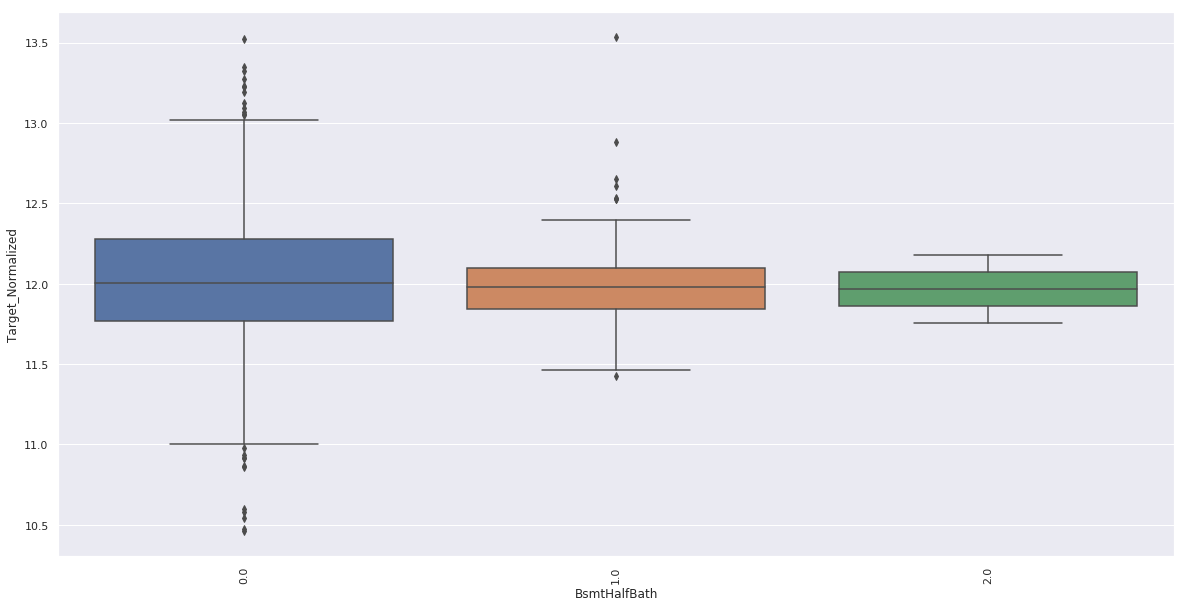

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='BsmtHalfBath', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

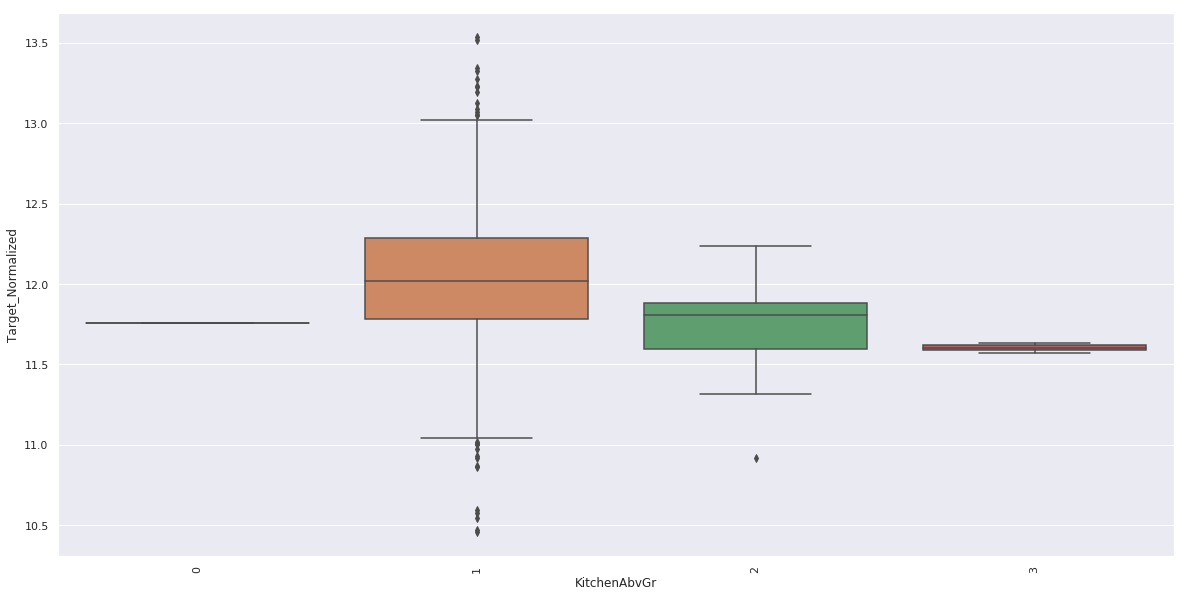

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x='KitchenAbvGr', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

Se va a dejar la variable KitchenAbvGr porque muestra una diferencia en el Target si tiene mas baños o cocinas, aunque BsmtHalfBath es dudoso si dejarla

*Variables ordinales*

In [29]:
vars_with_good_variance = variance_threshold_selector(train_imputed[variables_ordinales], 0.1).columns.tolist()
candidate_ordinal_vars = list(set(variables_ordinales) - set(vars_with_good_variance))
candidate_ordinal_vars

['Street', 'LandSlope', 'CentralAir']

Variables candidatas a eliminarse: Street, CentralAir, LandSlope

In [30]:
for col in candidate_ordinal_vars:
    print(train_imputed[col].value_counts())

0    1454
1       6
Name: Street, dtype: int64
3    1382
2      65
1      13
Name: LandSlope, dtype: int64
1    1365
0      95
Name: CentralAir, dtype: int64


In [31]:
for col in candidate_ordinal_vars:
    print(test_imputed[col].value_counts())

0    1453
1       6
Name: Street, dtype: int64
3    1396
2      60
1       3
Name: LandSlope, dtype: int64
1    1358
0     101
Name: CentralAir, dtype: int64


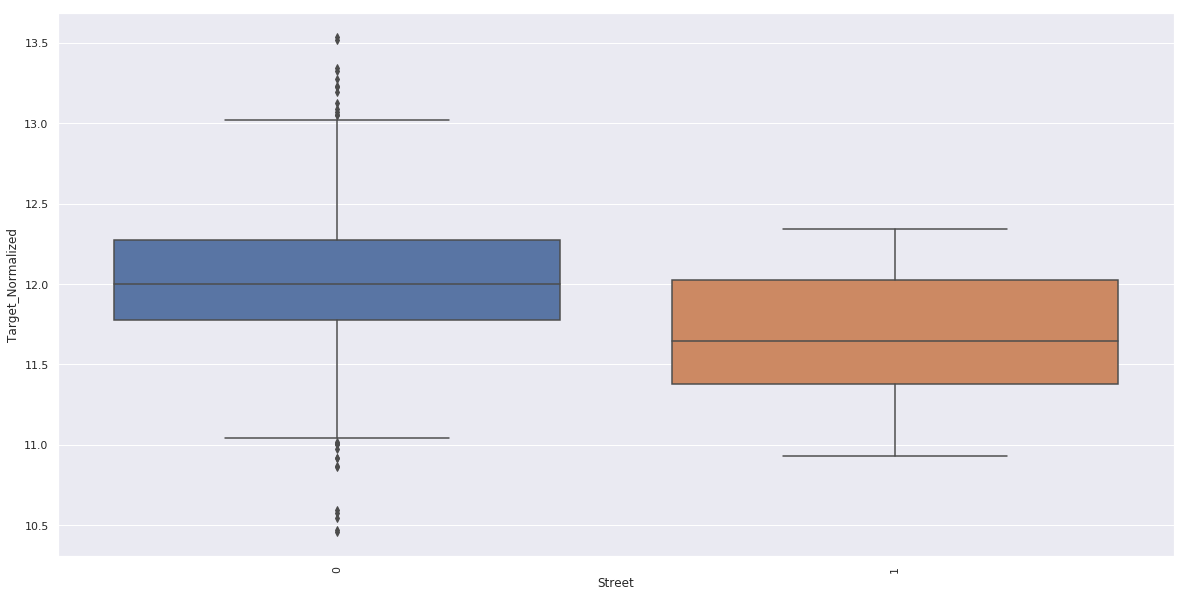

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Street', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

Street deja dudas para eliminarse porque hay diferencia para el target pero hay muy pocos ejemplos distintos

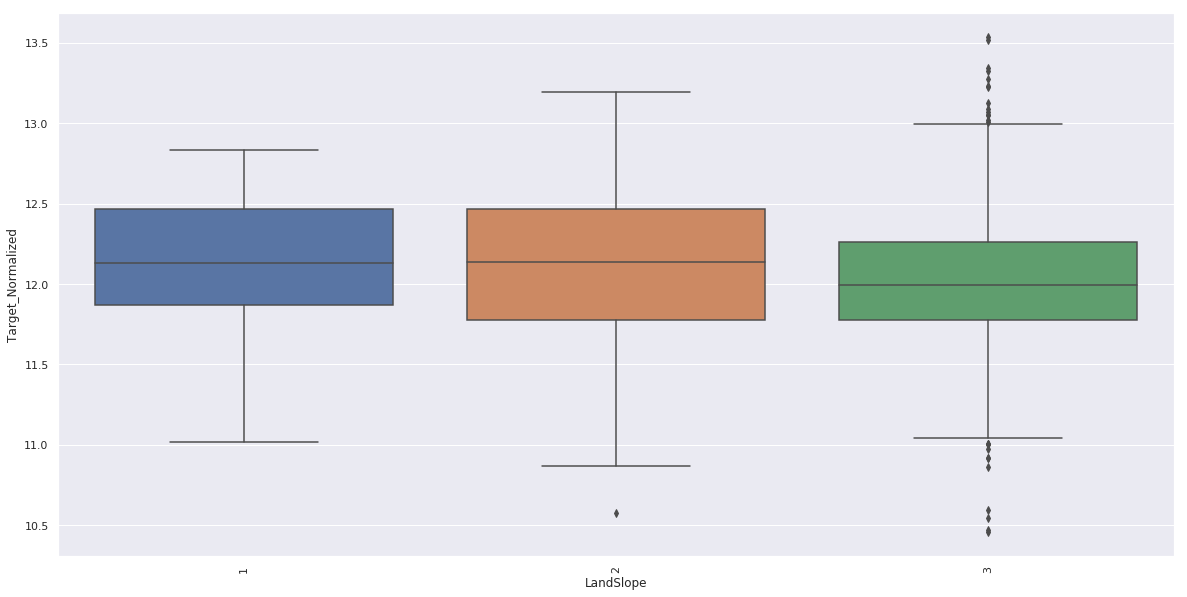

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x='LandSlope', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

La diferencia es pequeña en esta variable

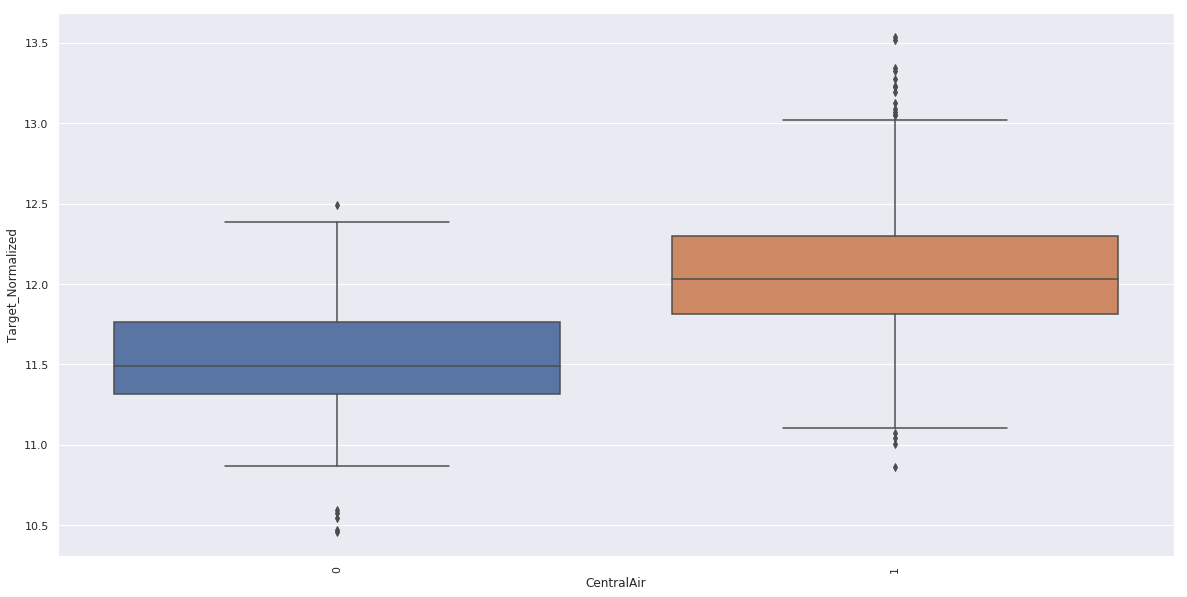

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x='CentralAir', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

Esta variable la dejaría, ya que la diferencia es notable de si hay o no calefacción central

*Variables categoricas*

In [35]:
for col in variables_categoricas:
    print(train_imputed[col].value_counts())

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shn

In [36]:
for col in variables_categoricas:
    print(test_imputed[col].value_counts())

WD       1259
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShn

Variables categoricas candidatas: Heating, Condition2, RoofMatl

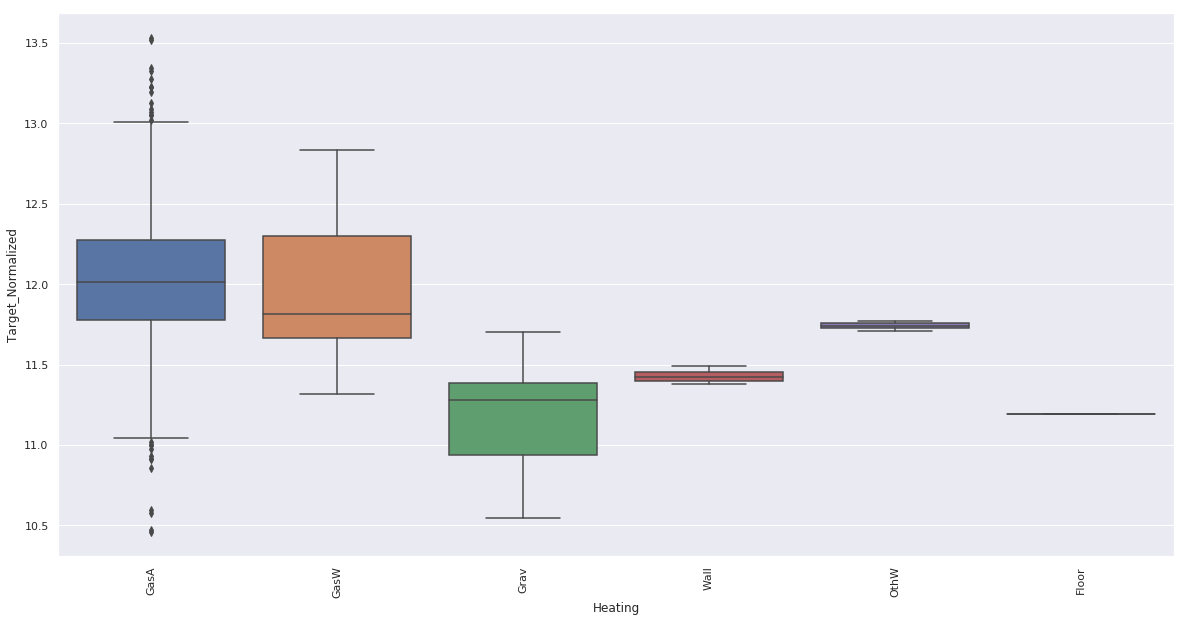

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Heating', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

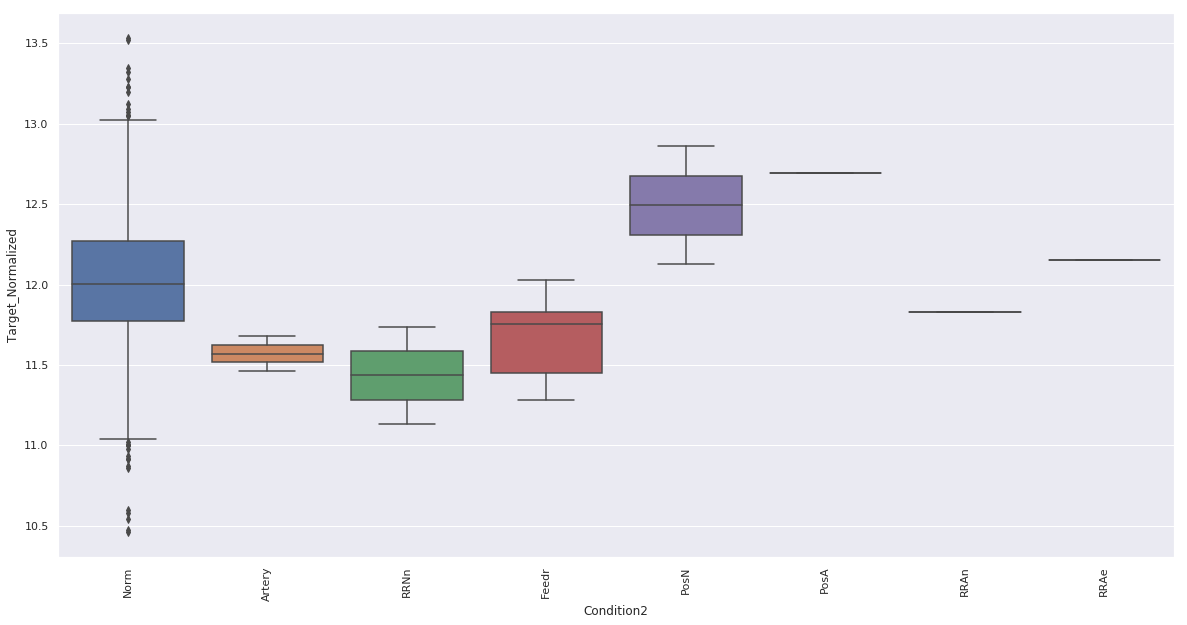

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Condition2', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

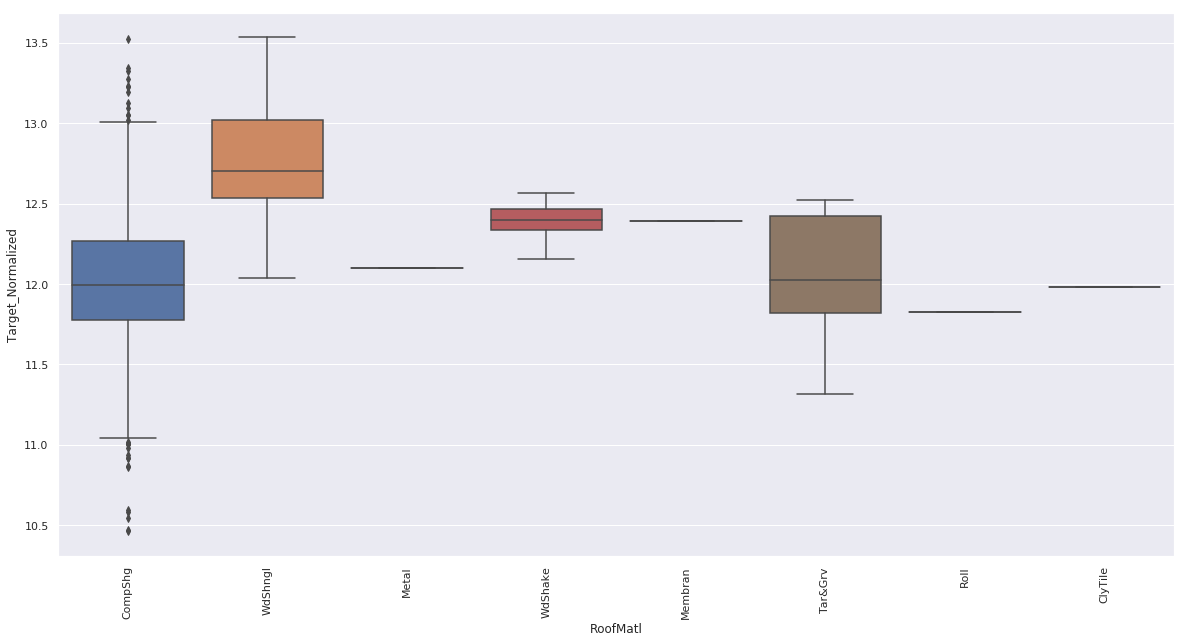

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(x='RoofMatl', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

En los boxplots se ven diferencias en los targets, sin embargo, los elementos distintos son muy pocos y en el test hay menos todavía. Yo eliminaría las 3 variables, aunque habría que probar.

In [40]:
train_imputed.drop(['Street', 'LandSlope', 'Heating', 'Condition2', 'RoofMatl'], axis=1, inplace=True)
test_imputed.drop(['Street', 'LandSlope', 'Heating', 'Condition2', 'RoofMatl'], axis=1, inplace=True)
variables_ordinales = list(set(variables_ordinales) - {'Street', 'LandSlope'})
variables_categoricas = list(set(variables_categoricas) - {'Heating', 'Condition2', 'RoofMatl'})
train_imputed.shape, test_imputed.shape

((1460, 70), (1459, 68))

**Outliers**

Se van a mostrar los scatterplots con las variables más correladas con la variable objetivo para analizar los valores extremos:

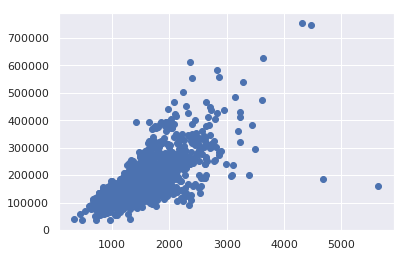

In [41]:
fig, ax = plt.subplots()
ax.scatter(x=train_imputed['GrLivArea'], y=train_imputed['SalePrice'])
plt.show()

Se puede ver como abajo a la derecha hay dos valores muy apartados de la dirección de los datos. Son outliers muy claros que hay que eliminar porque estarían metiendo mucho ruido en el modelo. 

In [42]:
train_imputed = train_imputed.drop(train_imputed[(train_imputed['GrLivArea']>4000) & (train_imputed['SalePrice']<300000)].index)

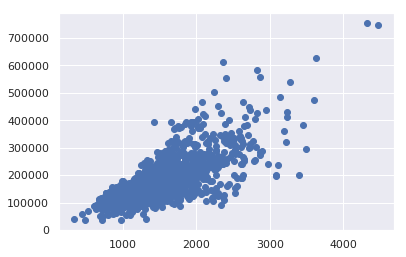

In [43]:
fig, ax = plt.subplots()
ax.scatter(x=train_imputed['GrLivArea'], y=train_imputed['SalePrice'])
plt.show()

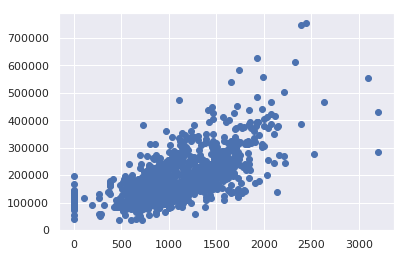

In [44]:
fig, ax = plt.subplots()
ax.scatter(x=train_imputed['TotalBsmtSF'], y=train_imputed['SalePrice'])
plt.show()

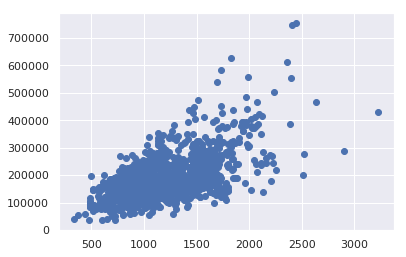

In [45]:
fig, ax = plt.subplots()
ax.scatter(x=train_imputed['1stFlrSF'], y=train_imputed['SalePrice'])
plt.show()

Del resto de variables no indican que haya que eliminar más instancias, ya que la eliminación de instancias puede ser peligrosa y en estos casos no se ven outliers extremos.

También se va a mostrar un boxplot para todas las variables con el fin de ver los outliers univariantes

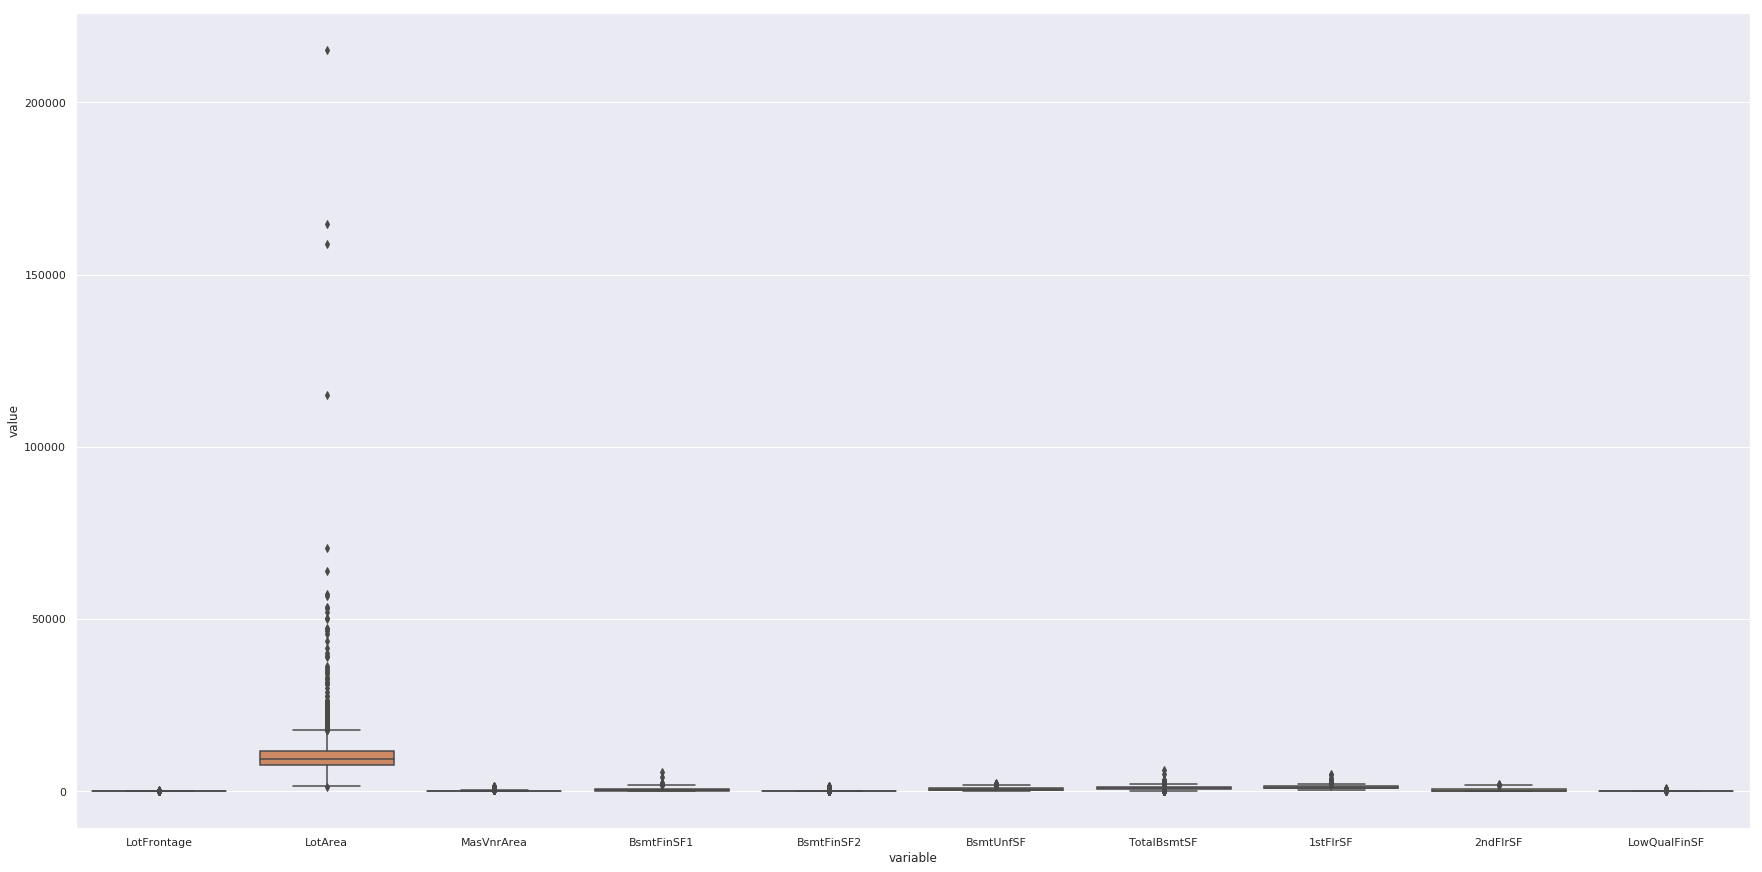

In [46]:
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x="variable", y="value", data=pd.melt(data[variables_numericas[:10]]), ax=ax)

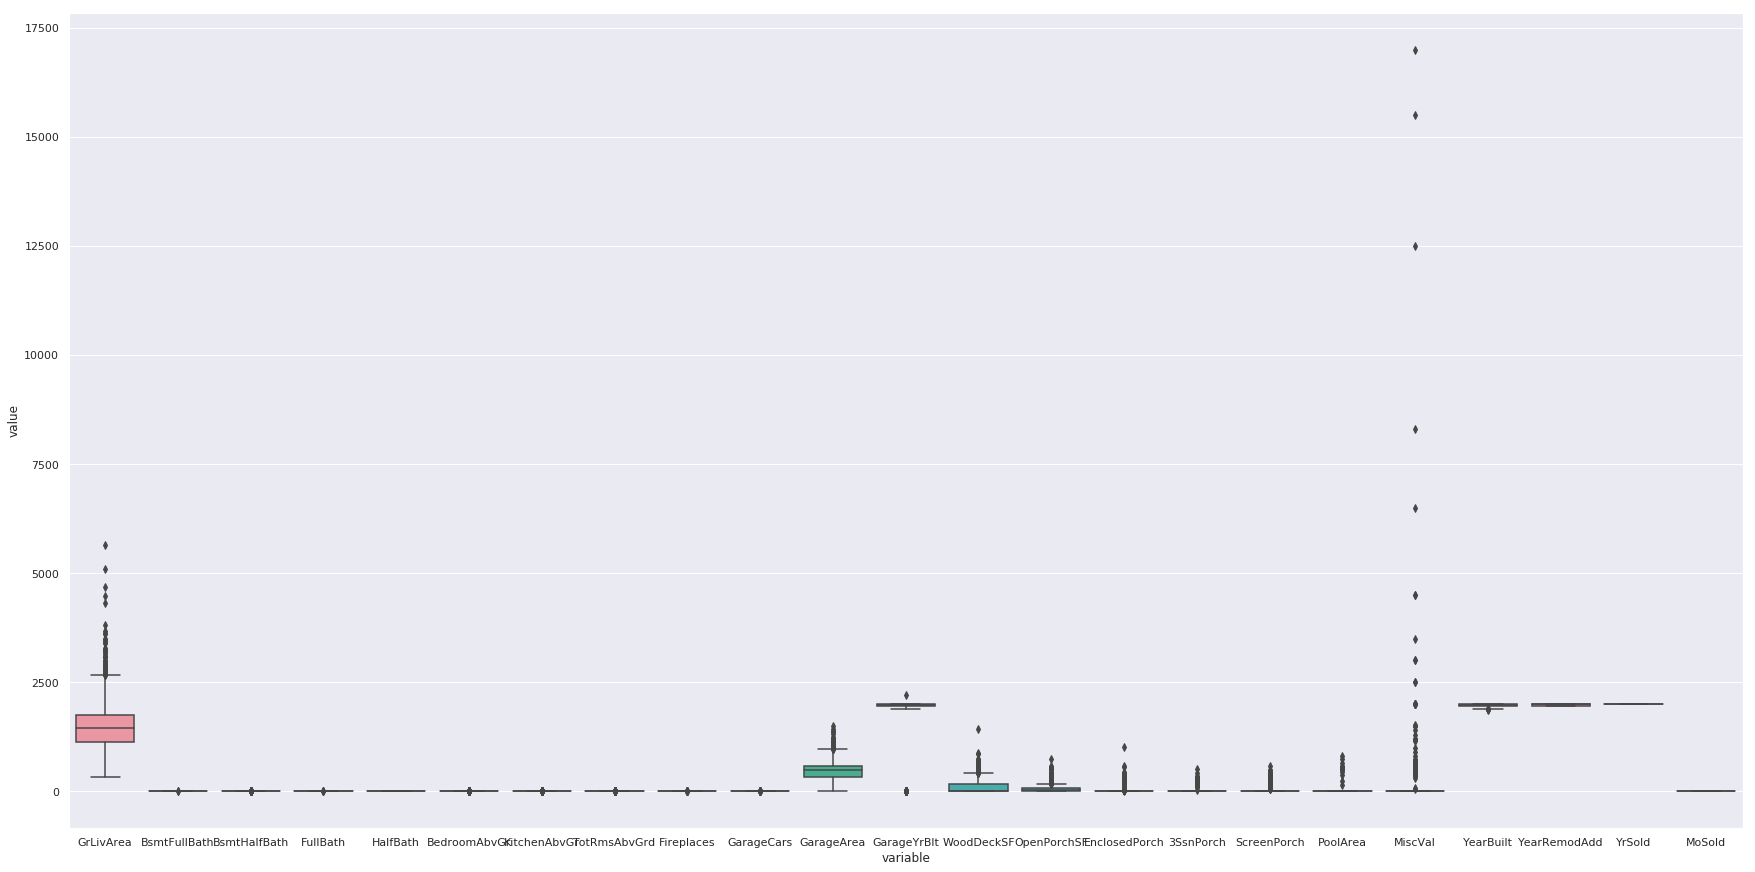

In [47]:
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x="variable", y="value", data=pd.melt(data[variables_numericas[10:]]), ax=ax)

Hay algunas variables con muchos outliers como LotArea, GrLivArea y MiscVal. En principio se van a normalizar los datos de forma robusta dependiendo del modelo en vez de eliminar los outliers. 

**Estudio de impacto de variables continuas sobre el target**

                                        Plots for LotFrontage                                         


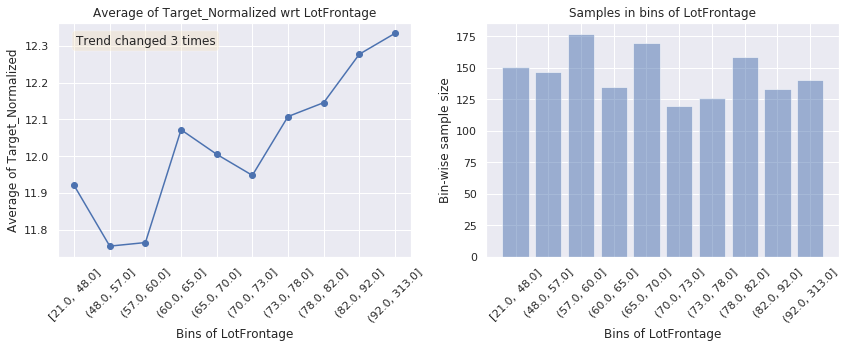

--------------------------------------------------------------------------------------------------------------


                                          Plots for LotArea                                           


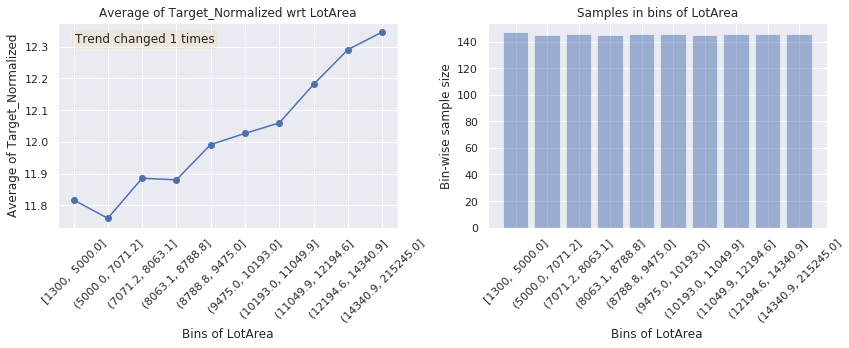

--------------------------------------------------------------------------------------------------------------


                                         Plots for MasVnrArea                                         


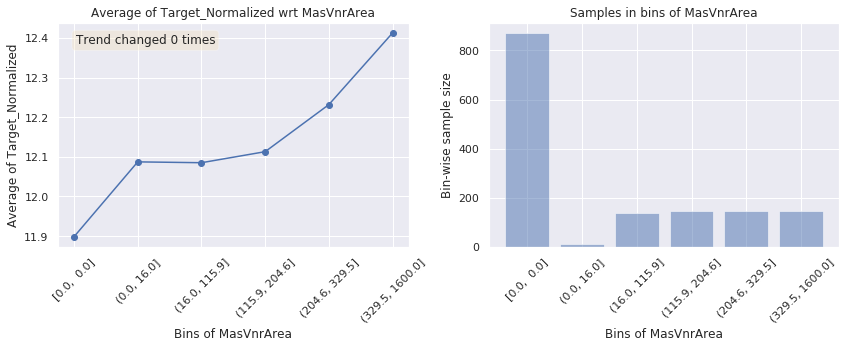

--------------------------------------------------------------------------------------------------------------


                                         Plots for BsmtFinSF1                                         


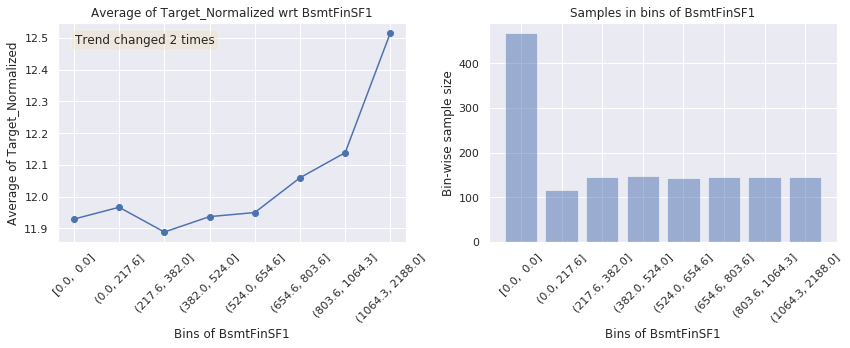

--------------------------------------------------------------------------------------------------------------


                                         Plots for BsmtFinSF2                                         


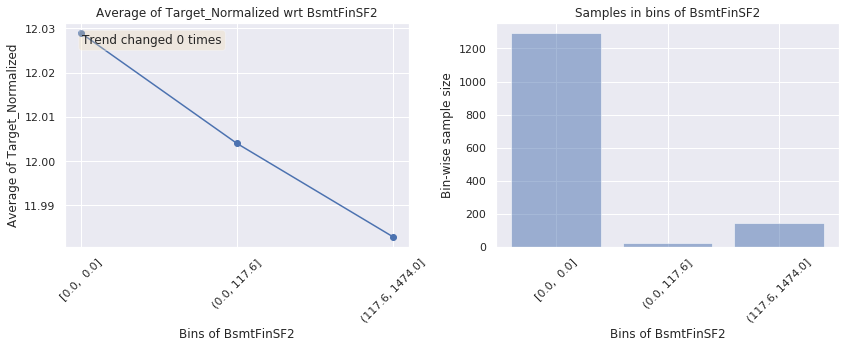

--------------------------------------------------------------------------------------------------------------


                                         Plots for BsmtUnfSF                                          


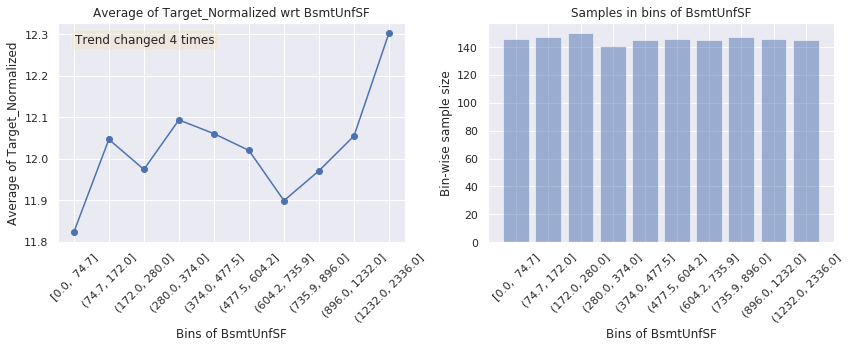

--------------------------------------------------------------------------------------------------------------


                                        Plots for TotalBsmtSF                                         


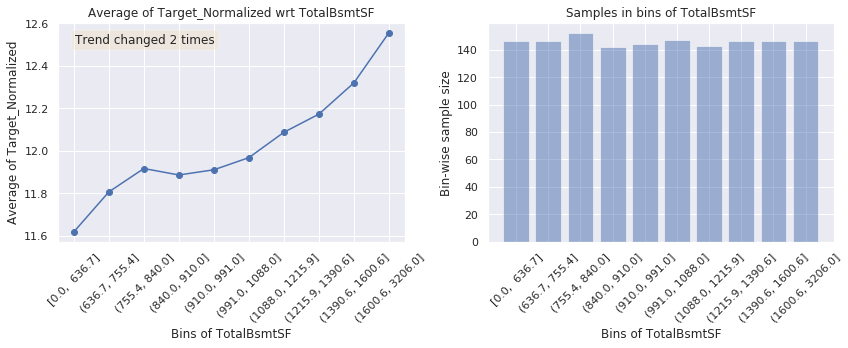

--------------------------------------------------------------------------------------------------------------


                                          Plots for 1stFlrSF                                          


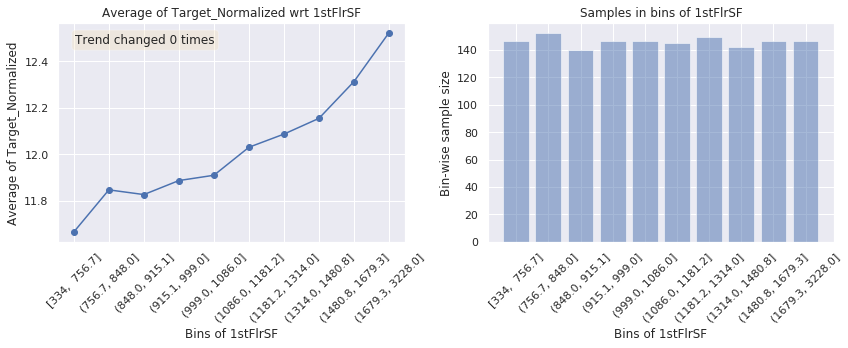

--------------------------------------------------------------------------------------------------------------


                                          Plots for 2ndFlrSF                                          


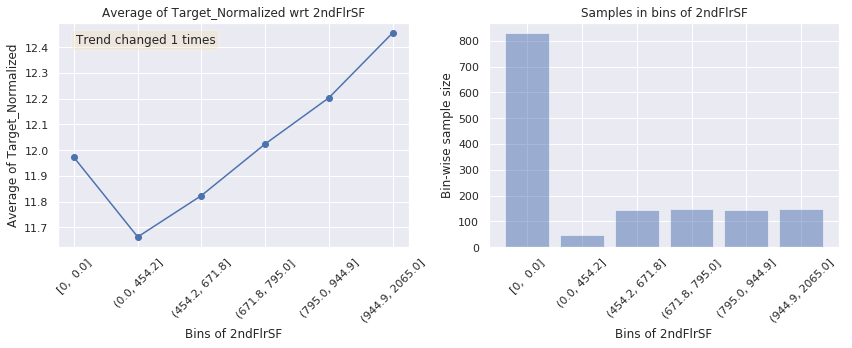

--------------------------------------------------------------------------------------------------------------


                                        Plots for LowQualFinSF                                        


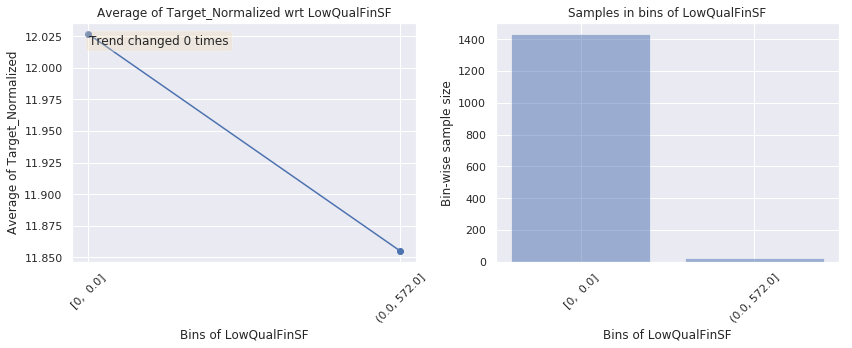

--------------------------------------------------------------------------------------------------------------


                                         Plots for GrLivArea                                          


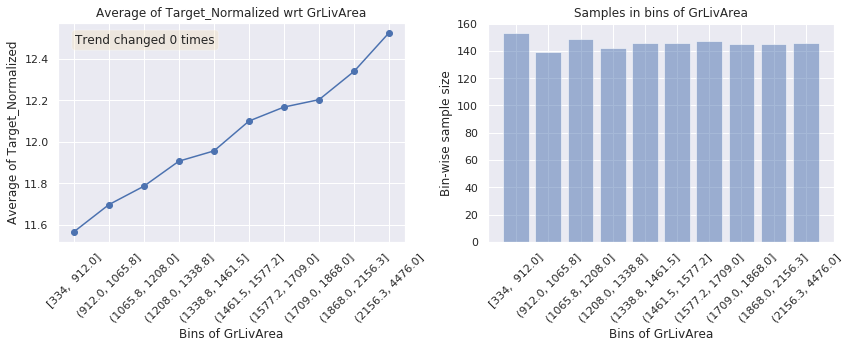

--------------------------------------------------------------------------------------------------------------


                                        Plots for BsmtFullBath                                        


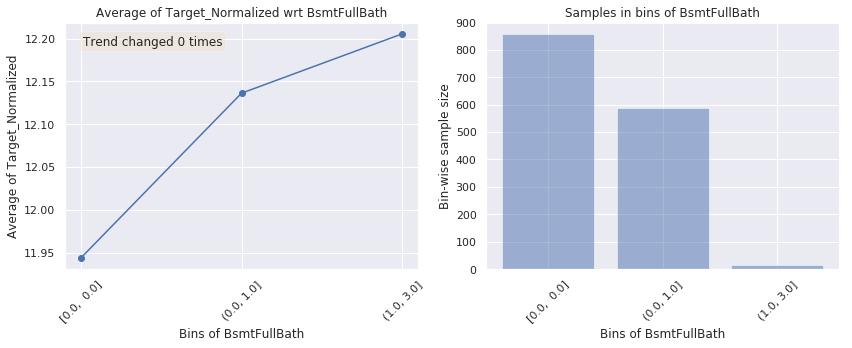

--------------------------------------------------------------------------------------------------------------


                                        Plots for BsmtHalfBath                                        


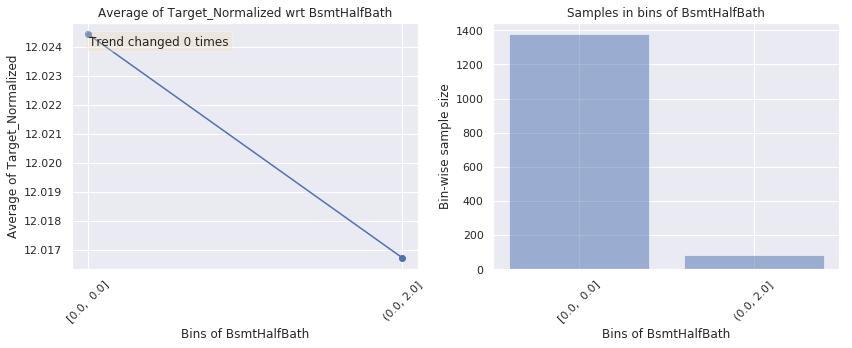

--------------------------------------------------------------------------------------------------------------


                                          Plots for FullBath                                          


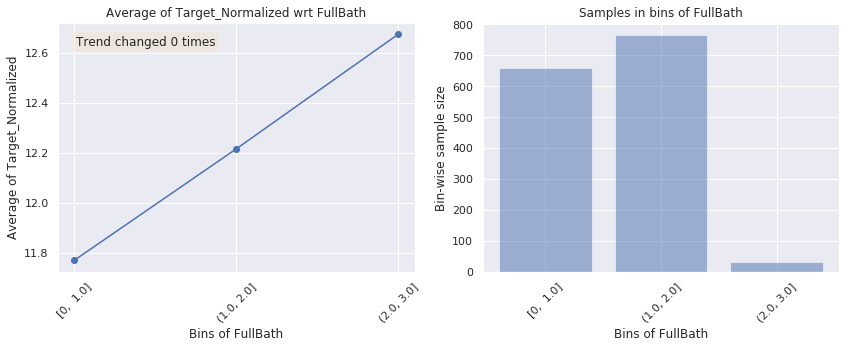

--------------------------------------------------------------------------------------------------------------


                                          Plots for HalfBath                                          


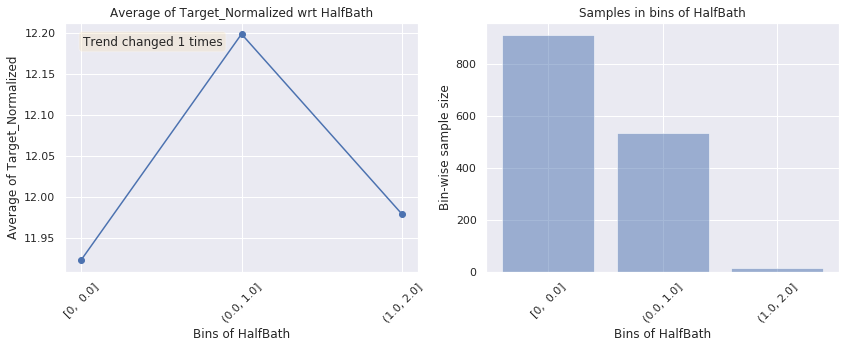

--------------------------------------------------------------------------------------------------------------


                                        Plots for BedroomAbvGr                                        


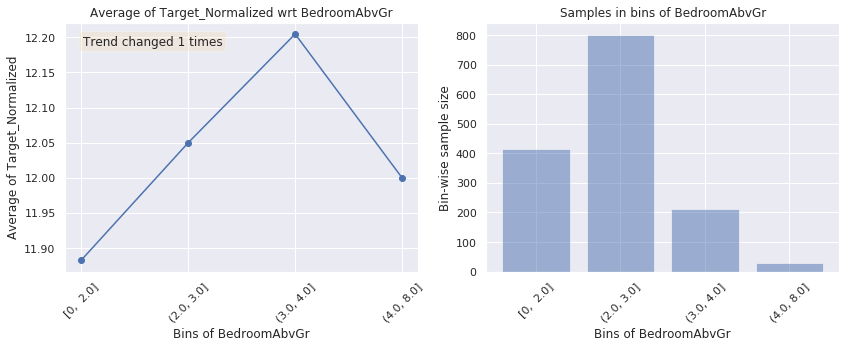

--------------------------------------------------------------------------------------------------------------


                                        Plots for KitchenAbvGr                                        


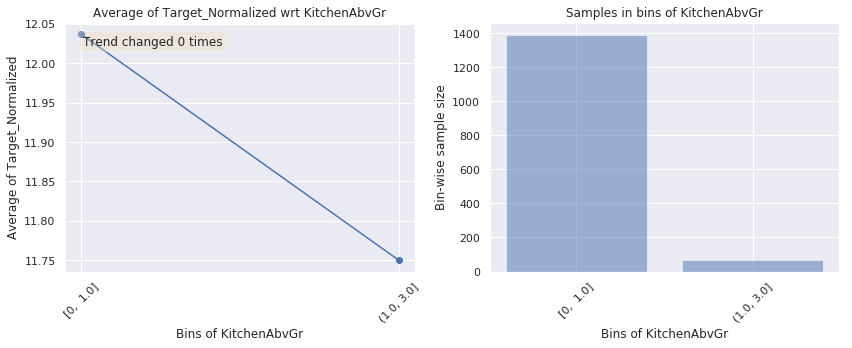

--------------------------------------------------------------------------------------------------------------


                                        Plots for TotRmsAbvGrd                                        


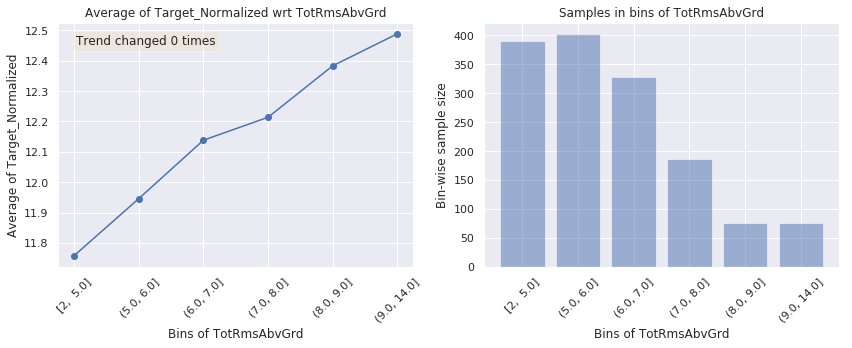

--------------------------------------------------------------------------------------------------------------


                                         Plots for Fireplaces                                         


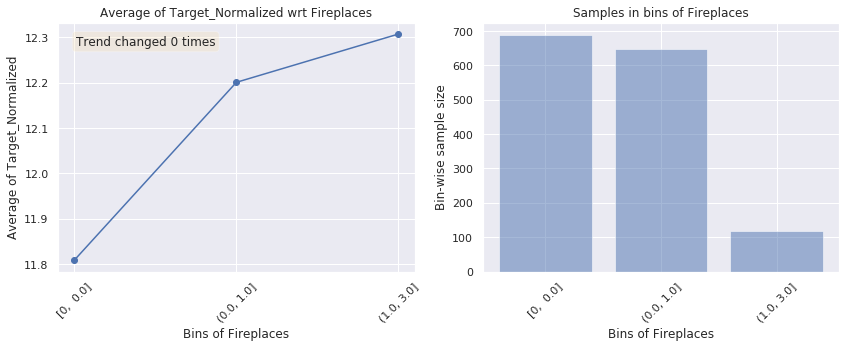

--------------------------------------------------------------------------------------------------------------


                                         Plots for GarageCars                                         


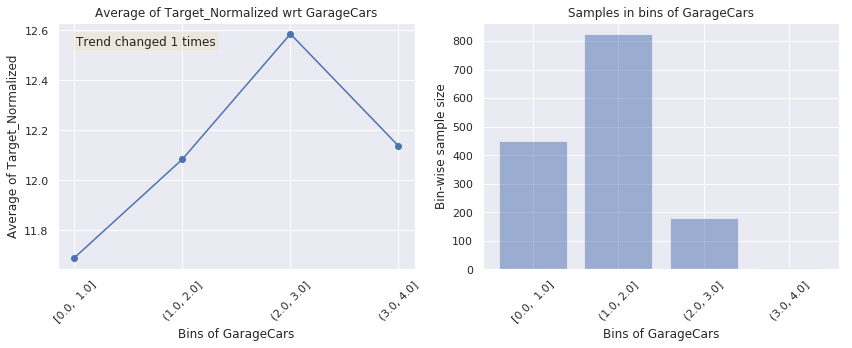

--------------------------------------------------------------------------------------------------------------


                                         Plots for GarageArea                                         


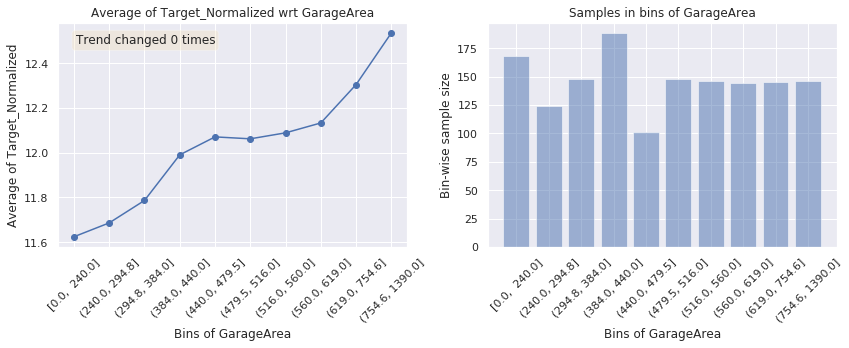

--------------------------------------------------------------------------------------------------------------


                                        Plots for GarageYrBlt                                         


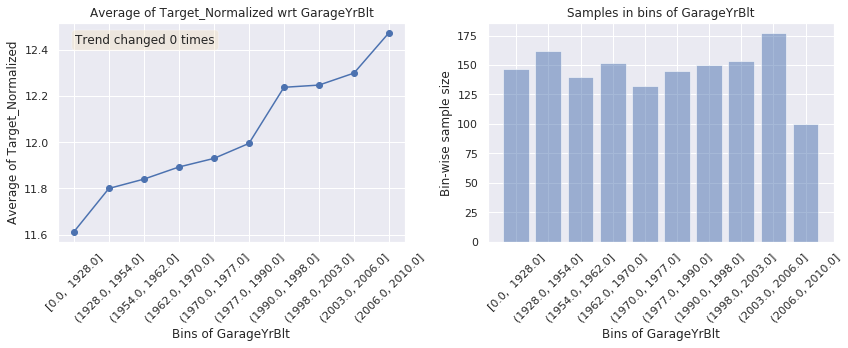

--------------------------------------------------------------------------------------------------------------


                                         Plots for WoodDeckSF                                         


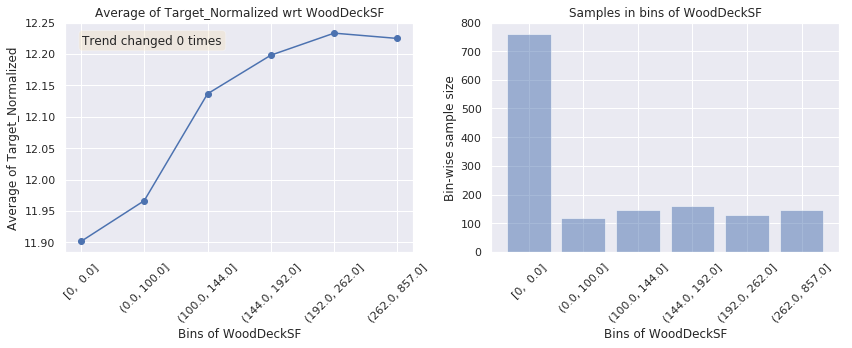

--------------------------------------------------------------------------------------------------------------


                                        Plots for OpenPorchSF                                         


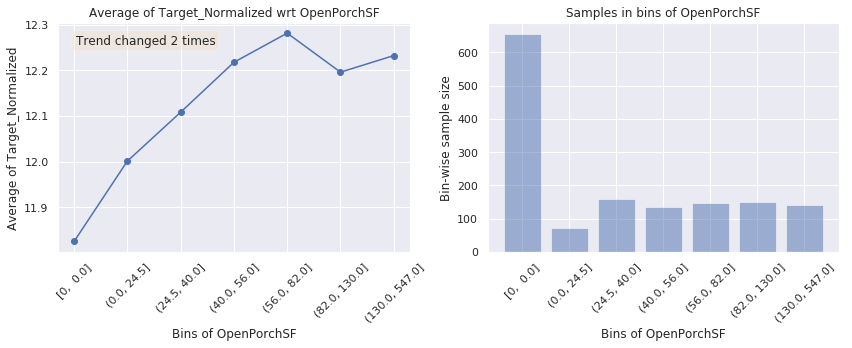

--------------------------------------------------------------------------------------------------------------


                                       Plots for EnclosedPorch                                        


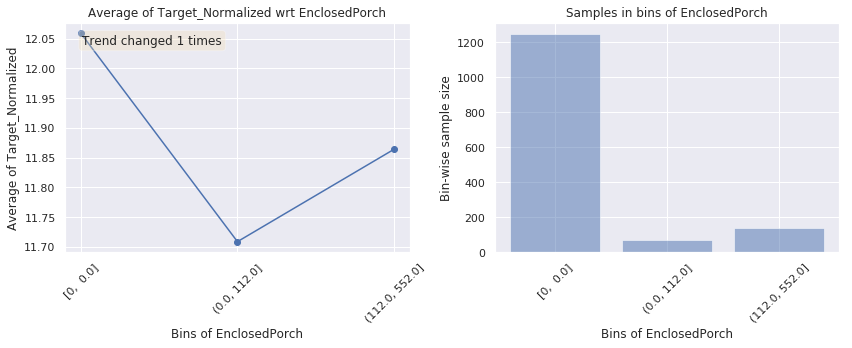

--------------------------------------------------------------------------------------------------------------


                                         Plots for 3SsnPorch                                          


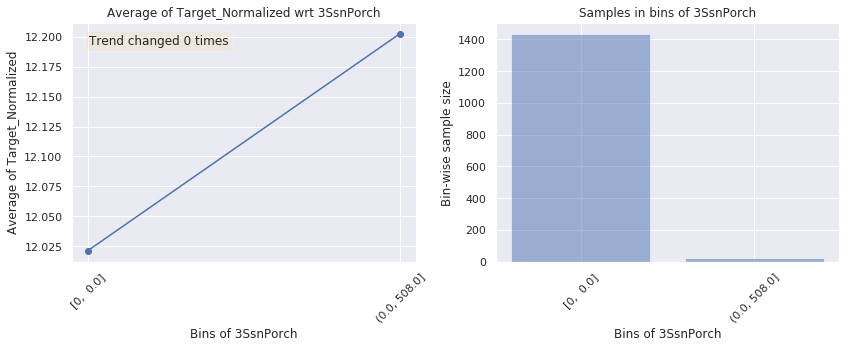

--------------------------------------------------------------------------------------------------------------


                                        Plots for ScreenPorch                                         


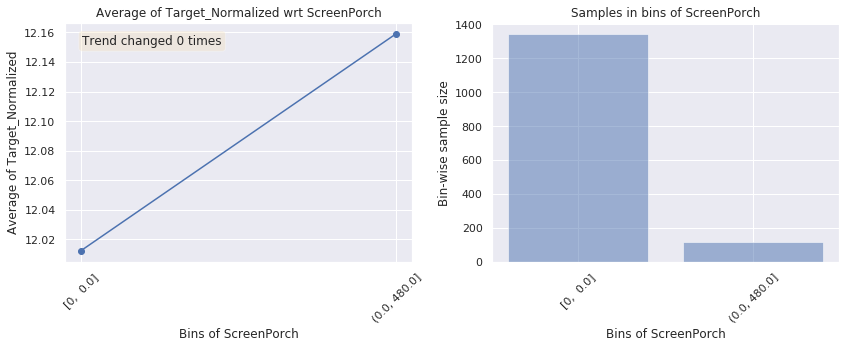

--------------------------------------------------------------------------------------------------------------


                                          Plots for PoolArea                                          


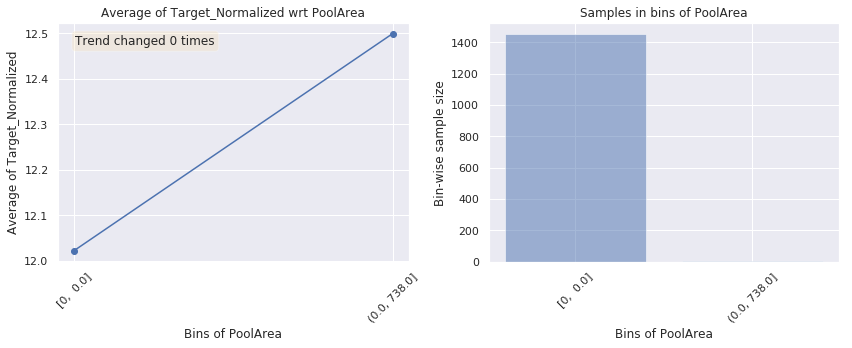

--------------------------------------------------------------------------------------------------------------


                                          Plots for MiscVal                                           


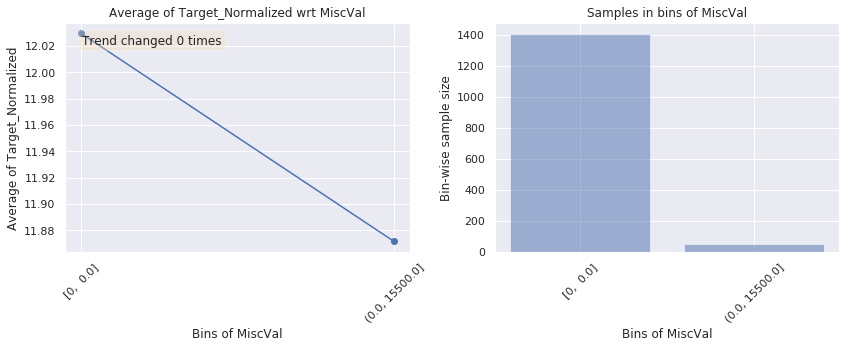

--------------------------------------------------------------------------------------------------------------


                                         Plots for YearBuilt                                          


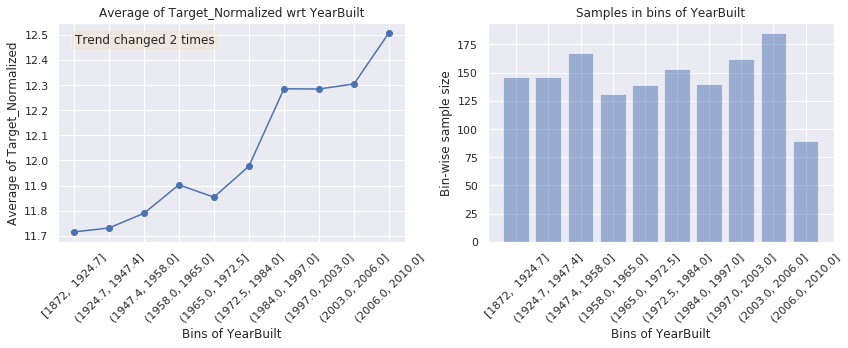

--------------------------------------------------------------------------------------------------------------


                                        Plots for YearRemodAdd                                        


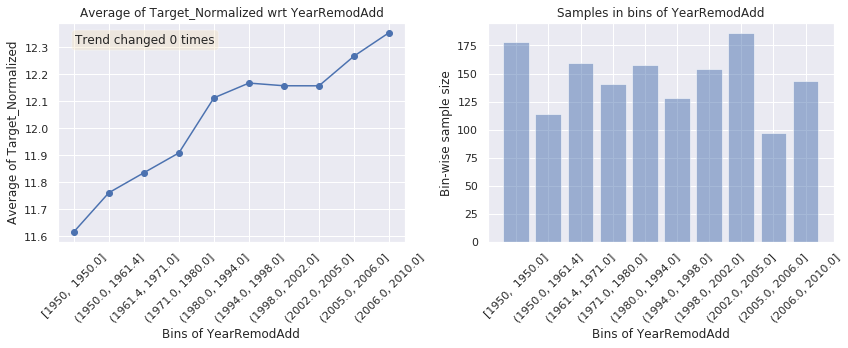

--------------------------------------------------------------------------------------------------------------


                                           Plots for YrSold                                           


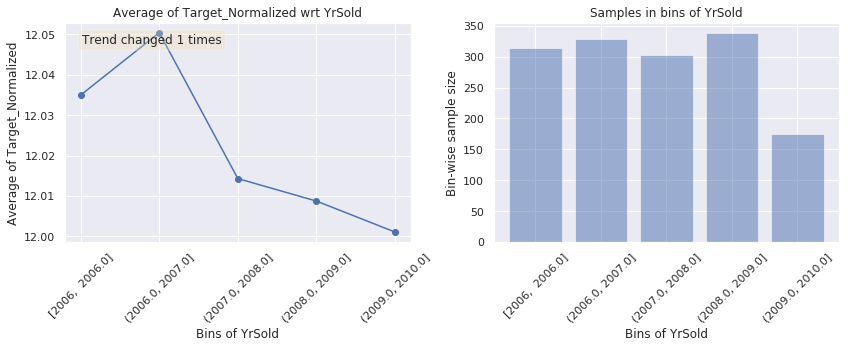

--------------------------------------------------------------------------------------------------------------


                                           Plots for MoSold                                           


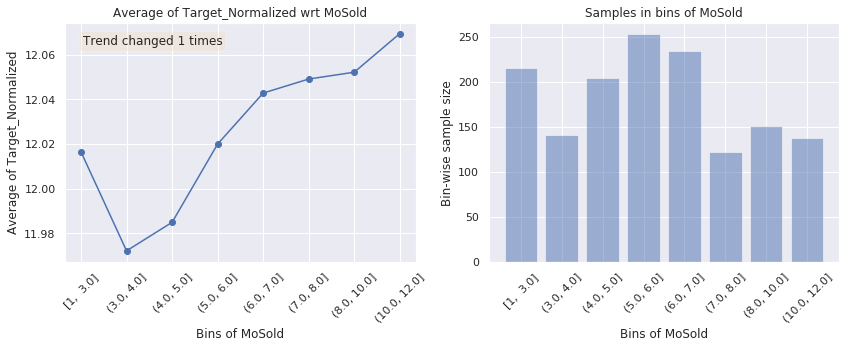

--------------------------------------------------------------------------------------------------------------




In [48]:
get_univariate_plots(data=train_imputed, target_col='Target_Normalized', features_list=variables_numericas)

Se pueden ver fuertes cambios de tendencia en cuando hay muchas habitaciones, plazas de garage o habitaciones. Probar a crear nuevas variables para indicar que se tratan de inmuebles especiales. Por ejemplo, si hay muchas habitaciones puede ser una casa de acogida. Las variables que muestran estos cambios de tendencia son, GarageCars, HalfBath, BedroomAbvGr

Ahora se van a mostrar boxplots para las variables de fechas respecto a la variable de salida:

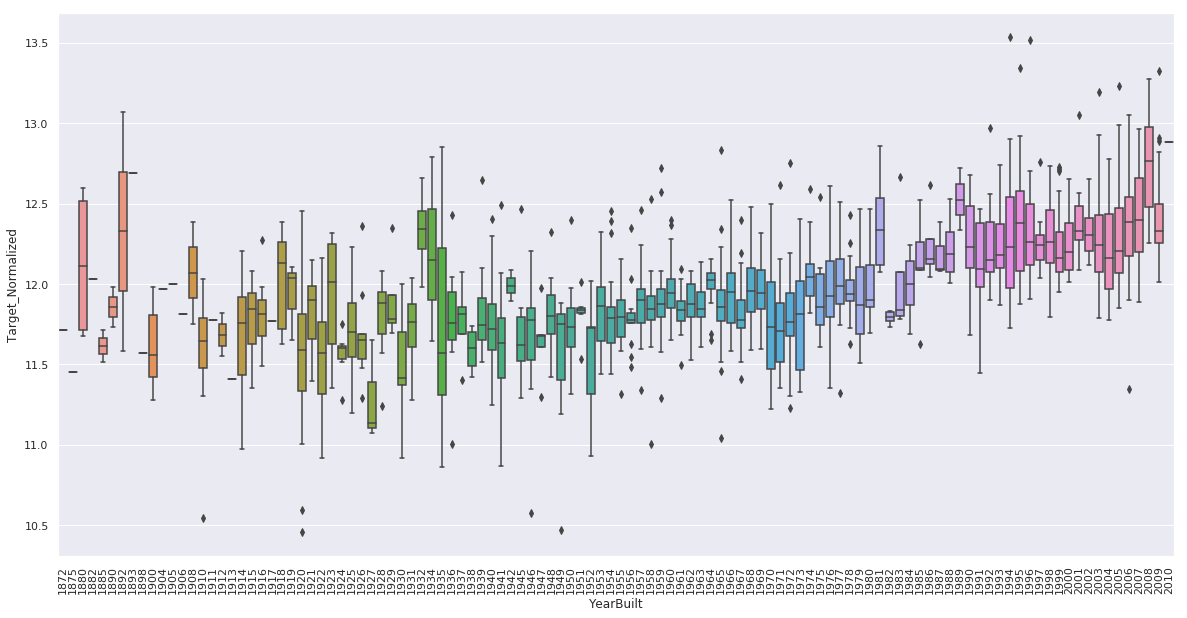

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(x='YearBuilt', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

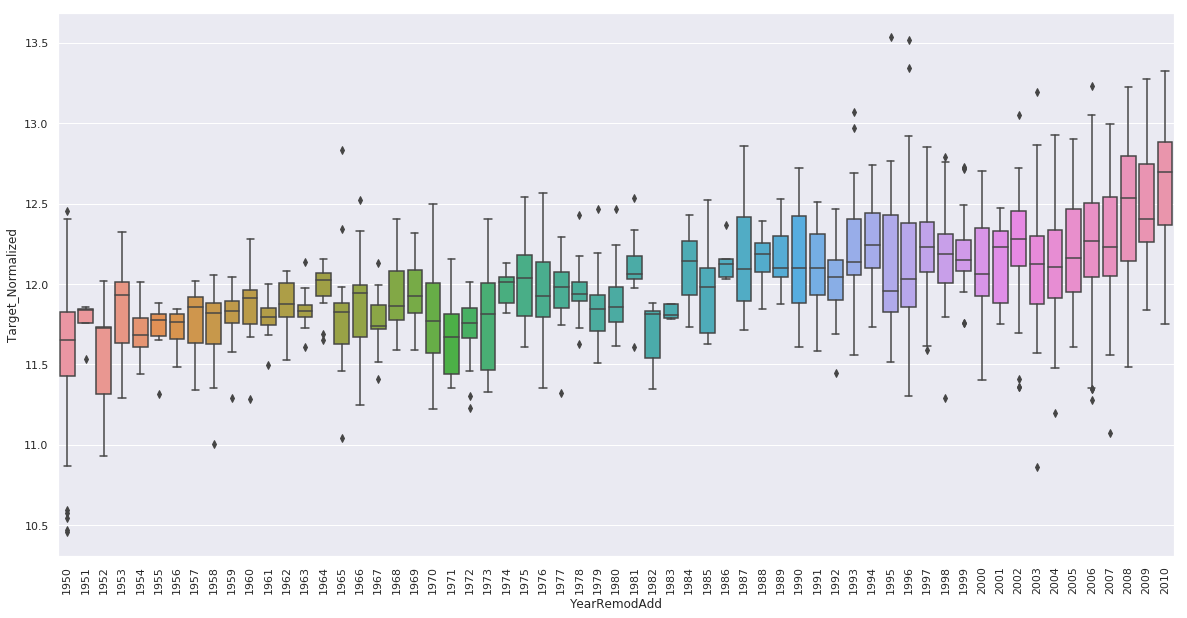

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x='YearRemodAdd', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

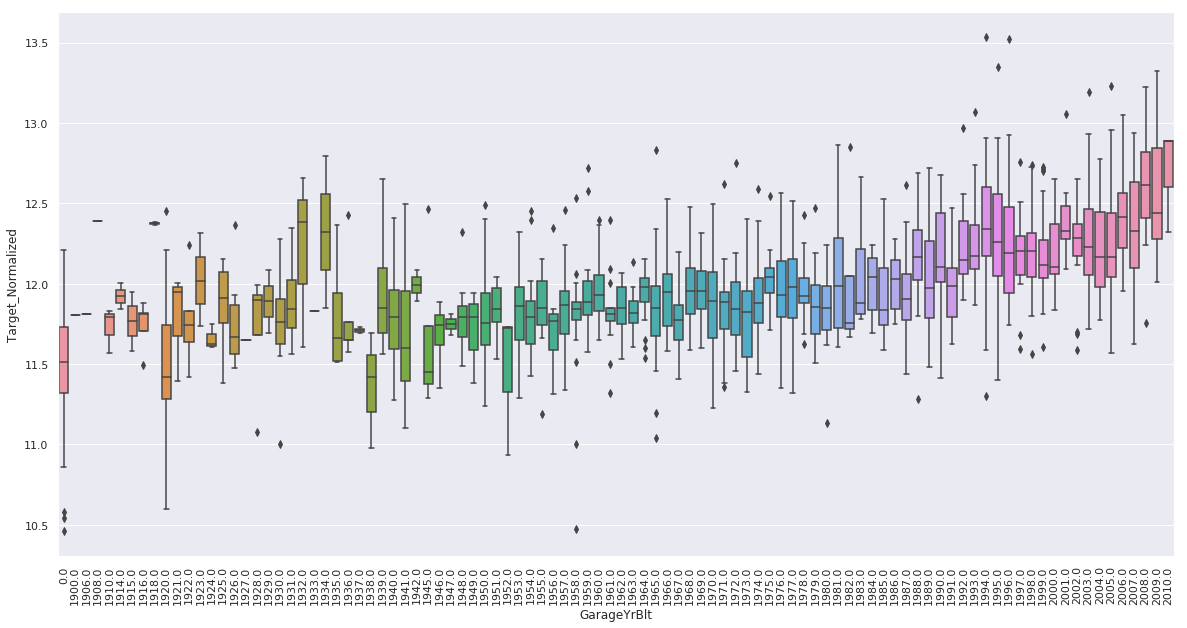

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x='GarageYrBlt', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

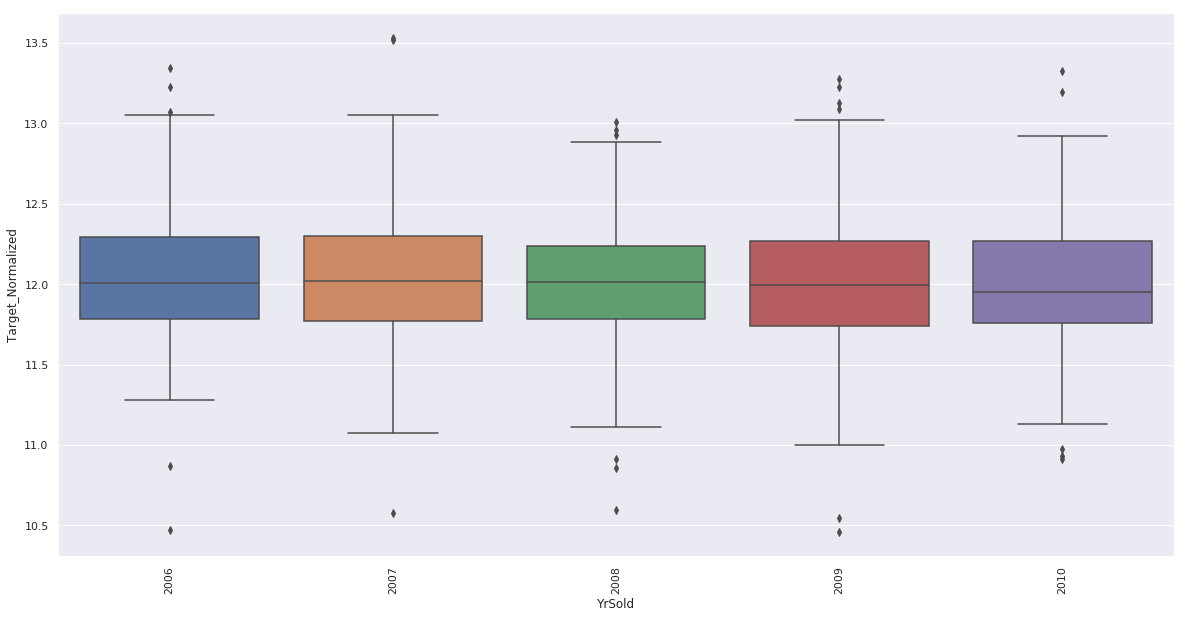

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x='YrSold', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

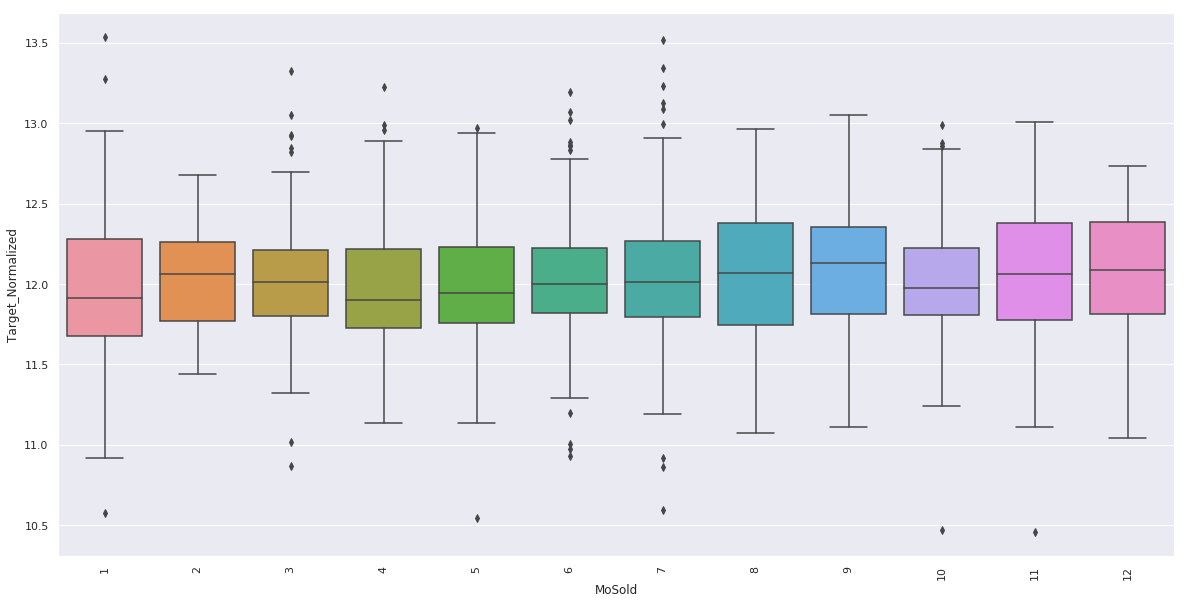

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x='MoSold', y="Target_Normalized", data=train_imputed)
plt.xticks(rotation=90);

Las variables YearBuilt, YearRemodAdd y GarageYrBlt muestran una correlación positiva con la variable adjetivo que se ve acentuada en los años recientes. Por lo tanto, podriamos considerar estas variables importantes.

**Variables Skewed**

En este apartado se van a ver las variables o predictores Skewed con el fin de aplicarles una transformación para que sigan una distribución lo más normal posible. La distribución normal en los predictores suele mejorar el modelado.

In [54]:
data_clean = pd.concat((train_imputed.drop(['SalePrice', 'Target_Normalized'], axis=1), test_imputed)).reset_index(drop=True)
data_clean.shape

(2917, 68)

In [55]:
skewed_feats = data_clean[variables_numericas + variables_ordinales].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew en variables numéricas y ordinales: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew en variables numéricas y ordinales: 



Skew
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101
BsmtHalfBath    3.929996
BsmtFinType2    3.150951
MasVnrArea      2.621719
OpenPorchSF     2.529358
WoodDeckSF      1.844792
ExterCond       1.315069
1stFlrSF        1.257286
BsmtExposure    1.119066
LotFrontage     1.102764
GrLivArea       1.068750
BsmtFinSF1      0.980645

In [56]:
skewness = skewness[abs(skewness) > 0.75]
print("Hay {} variables skewed para aplicarle la transformacion BoxCox".format(skewness.shape[0]))

skewed_features = skewness.index
for feat in skewed_features:
    data_clean[feat] = boxcox1p(data_clean[feat], boxcox_normmax(data_clean[feat] + 1))

Hay 50 variables skewed para aplicarle la transformacion BoxCox


**Creación de nuevas variables**

Metros cuadrados de la vivienda totales:

In [57]:
data_clean['TotalSF'] = data_clean['TotalBsmtSF'] + data_clean['1stFlrSF'] + data_clean['2ndFlrSF']

Edad de la casa (se aplica también para normalizar la variable):

In [58]:
data_clean['House_age'] = data_clean['YearBuilt'].max() - data_clean['YearBuilt']

Tiempo de la remodelación:

In [59]:
data_clean['Remodel_age'] = data_clean['YearRemodAdd'].max() - data_clean['YearRemodAdd']

Saber si la casa ha sido remodelada:

In [60]:
data_clean['Is_remodeled'] = data_clean['YearBuilt'] != data_clean['YearRemodAdd']

Saber el tiempo entre la remodelación y la construccion:

In [61]:
data_clean['Remodel_delay'] = data_clean['YearRemodAdd'] - data_clean['YearBuilt']

Tiempo del garage:

In [62]:
data_clean['Garage_age'] = data_clean['GarageYrBlt'].max() - data_clean['GarageYrBlt']

Saber si el garage se hizo en el mismo tiempo que la remodelación:

In [63]:
data_clean['Is_garage_remodel'] = data_clean['GarageYrBlt'] == data_clean['YearRemodAdd']

Area disponible por coche en el garage:

In [64]:
data_clean['Garage_area_per_car'] = data_clean['GarageArea'] / data_clean['GarageCars']
data_clean['Garage_area_per_car'].fillna(0, inplace=True)

Tiempo desde que se construyó la casa hasta que fue vendida:

In [65]:
data_clean['House_stock_duration'] = data_clean['YrSold'] - data_clean['YearBuilt']

Duración de la venta:

In [66]:
data_clean['Yr_sold_age'] = data_clean['YrSold'].max() - data_clean['YrSold']

Metros cuadrados totales de toda la casa:

In [67]:
data_clean['Total_sf_house'] = data_clean['TotalSF'] + data_clean['GrLivArea']

Proporcion de metros cuadrados de la casa respecto al GrLivArea:

In [68]:
data_clean['Proportional_sf_house'] = data_clean['TotalSF'] / data_clean['GrLivArea']

Garage con muchas plazas:

In [69]:
data_clean['big_garage'] = data_clean['GarageCars'].apply(lambda x: 1 if x > 3 else 0)

Casa con muchas habitaciones:

In [70]:
data_clean['lot_of_bedrooms'] = data_clean['BedroomAbvGr'].apply(lambda x: 1 if x > 4 else 0)

Casa con muchos baños medianos:

In [71]:
data_clean['lot_of_half_baths'] = data_clean['HalfBath'].apply(lambda x: 1 if x > 1 else 0)

Variables expuestas en otros kernels de Kaggle:

In [72]:
data_clean['YrBltAndRemod'] = data_clean['YearBuilt'] + data_clean['YearRemodAdd']

data_clean['Total_sqr_footage'] = (data_clean['BsmtFinSF1'] + data_clean['BsmtFinSF2'] +
                                 data_clean['1stFlrSF'] + data_clean['2ndFlrSF'])

data_clean['Total_Bathrooms'] = (data_clean['FullBath'] + (0.5 * data_clean['HalfBath']) +
                               data_clean['BsmtFullBath'] + (0.5 * data_clean['BsmtHalfBath']))

data_clean['Total_porch_sf'] = (data_clean['OpenPorchSF'] + data_clean['3SsnPorch'] +
                              data_clean['EnclosedPorch'] + data_clean['ScreenPorch'] +
                              data_clean['WoodDeckSF'])

data_clean['haspool'] = data_clean['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data_clean['has2ndfloor'] = data_clean['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data_clean['hasgarage'] = data_clean['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_clean['hasbsmt'] = data_clean['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_clean['hasfireplace'] = data_clean['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [73]:
data_clean.isna().sum().sum()

0

Por último se van a eliminar variables que sobran por haberlas normalizado o que hemos analizado que son malas:

In [74]:
data_clean.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MiscVal', 'LotShape', 'BsmtHalfBath'], axis=1, inplace=True)

In [75]:
train_clean = data_clean[:train_imputed.shape[0]]
test_clean = data_clean[train_imputed.shape[0]:]

train_clean['SalePrice'] = train_imputed['SalePrice'].values
train_clean['Target_Normalized'] = train_imputed['Target_Normalized'].values

In [76]:
train_clean.to_csv('data/train_clean.csv', index=False)
test_clean.to_csv('data/test_clean.csv', index=False)